# <center><h1><b>Introduction</b></h1></center>
<p>
Gliomas represent the most prevalent primary brain tumors and are categorized as either LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) based on histological and imaging criteria. The grading process is significantly influenced by both clinical and molecular/mutation factors. However, molecular tests, although valuable for precise diagnosis, can be costly for glioma patients.
Within our dataset, we have focused on the 20 most frequently mutated genes and three clinical features extracted from the TCGA-LGG and TCGA-GBM brain glioma projects.

Our objective is to identify the key variables that can effectively indicate the early signs of LGG (Lower-Grade Glioma).
</p>

# <center><h1><b>Analysis</b></h1></center>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme)
#The Cancer Genome Atlas.
df = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv',header = 0)

In [3]:
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


<p>
    We are filtering two 'Grade' column values such as LGG and GBM. We are also removing irrelevant values from 'Gender' column '--'.
</p>

In [4]:
#Taking Grade either as 'LGG' or 'GBM'
dataset = df[(df['Grade'] == 'LGG') | (df['Grade'] == 'GBM')]
#Removing dataset where Gender is '--'
dataset = dataset[dataset['Gender']!='--']

<p>
    We are converting 'Gender' column 0 for 'Female' and 1 and 'Male'. We are also converting 'Grase' column 0 for 'GBM' and 1 and 'LGG'.
</p>

In [5]:
#Convert Gender column in binary format
dataset['Gender'] = dataset['Gender'].map(lambda x: 0 if x in 'Female'else 1)
#Convert Grade column in binary format 0 for GBM and 1 for LGG
dataset['Grade'] = dataset['Grade'].map(lambda x: 0 if x in 'GBM'else 1)

<p>
    We are converting 'Age_in_diagonis' column from string data type to 'Age_in_years' column into numerical data type.
</p>

In [6]:
#=======================Converting age in years (numerical) value=========================================
def age_in_years(age):
    words = age.split()
    #Initialize variables to store the years and days
    years = 0
    days = 0
    # Loop through the words and extract the years and days
    for i in range(len(words)):
        if words[i] == "years":
            years = int(words[i - 1])
        elif words[i] == "days":
            days = int(words[i - 1])
    # Convert the days into years (assuming 365 days in a year)
    years += days / 365
    return years
#==========================================================================================================

In [7]:
#Applying 'age_in_years' function for 'Age_in_years' column.
dataset['Age_in_years'] = dataset['Age_at_diagnosis'].apply(age_in_years)

In [8]:
#Create age column if age is less than the average years of patient 0 else 1
dataset['Age'] = dataset['Age_in_years'].map(lambda x: 0 if x < dataset['Age_in_years'].mean() else 1)

In [9]:
#Dropping columns which cannot be used for Predictive Model
dataset.drop(columns = ['Age_at_diagnosis','Project','Case_ID','Primary_Diagnosis'],axis = 1, inplace = True)

In [10]:
#==========Creating a method to convert the String values 'MUTATED' to 1 and 'NOT_MUTATED' to 0========
def binary_conversion(data):
    if data == 'MUTATED':
        return 1
    else:
        return 0
#======================================================================================================

In [11]:
#===========Applying binary_conversion method to 20 attributes containing genes related information========
dataset['IDH1'] = dataset['IDH1'].map(binary_conversion)
dataset['TP53'] = dataset['TP53'].map(binary_conversion)
dataset['ATRX'] = dataset['ATRX'].map(binary_conversion)
dataset['PTEN'] = dataset['PTEN'].map(binary_conversion)
dataset['EGFR'] = dataset['EGFR'].map(binary_conversion)
dataset['CIC'] = dataset['CIC'].map(binary_conversion)
dataset['MUC16'] = dataset['MUC16'].map(binary_conversion)
dataset['PIK3CA'] = dataset['PIK3CA'].map(binary_conversion)
dataset['NF1'] = dataset['NF1'].map(binary_conversion)
dataset['PIK3R1'] = dataset['PIK3R1'].map(binary_conversion)
dataset['FUBP1'] = dataset['FUBP1'].map(binary_conversion)
dataset['RB1'] = dataset['RB1'].map(binary_conversion)
dataset['NOTCH1'] = dataset['NOTCH1'].map(binary_conversion)
dataset['BCOR'] = dataset['BCOR'].map(binary_conversion)
dataset['CSMD3'] = dataset['CSMD3'].map(binary_conversion)
dataset['SMARCA4'] = dataset['SMARCA4'].map(binary_conversion)
dataset['GRIN2A'] = dataset['GRIN2A'].map(binary_conversion)
dataset['IDH2'] = dataset['IDH2'].map(binary_conversion)
dataset['FAT4'] = dataset['FAT4'].map(binary_conversion)
dataset['PDGFRA'] = dataset['PDGFRA'].map(binary_conversion)
#==========================================================================================================

In [12]:
#=================Removing 'not reported' value from Race column====================
dataset = dataset[dataset['Race']!='not reported']
#===================================================================================

In [13]:
#=====================Create dummy variables for Race column=======================
dataset = pd.get_dummies(dataset, columns=['Race'])
#==================================================================================

In [46]:
def con_bool_to_int(s):
    if s is True:
        s = 1
    else:
        s = 0
    return s

In [47]:
#==================================Renaming multiple columns===============================================
dataset = dataset.rename(columns={'Race_american indian or alaska native': 'NativeAmerican', 'Race_black or african american': 'AfricanAmerican'})

In [48]:
dataset['NativeAmerican'] = dataset['NativeAmerican'].map(con_bool_to_int)
dataset['Race_asian'] = dataset['Race_asian'].map(con_bool_to_int)
dataset['AfricanAmerican'] = dataset['AfricanAmerican'].map(con_bool_to_int)
dataset['Race_white'] = dataset['Race_white'].map(con_bool_to_int)

<p>
    Based on the correlation plot "IDH1" has a high <b>Positive correlation</b> (0.708432) with "Grade," it indicates that higher values of "IDH1" are strongly associated with higher-grade conditions. Conversely, if "Age" has a high <b>Negative correlation</b> (-0.472121) with "Grade," it means that increasing age is strongly associated with lower-grade conditions
</p>

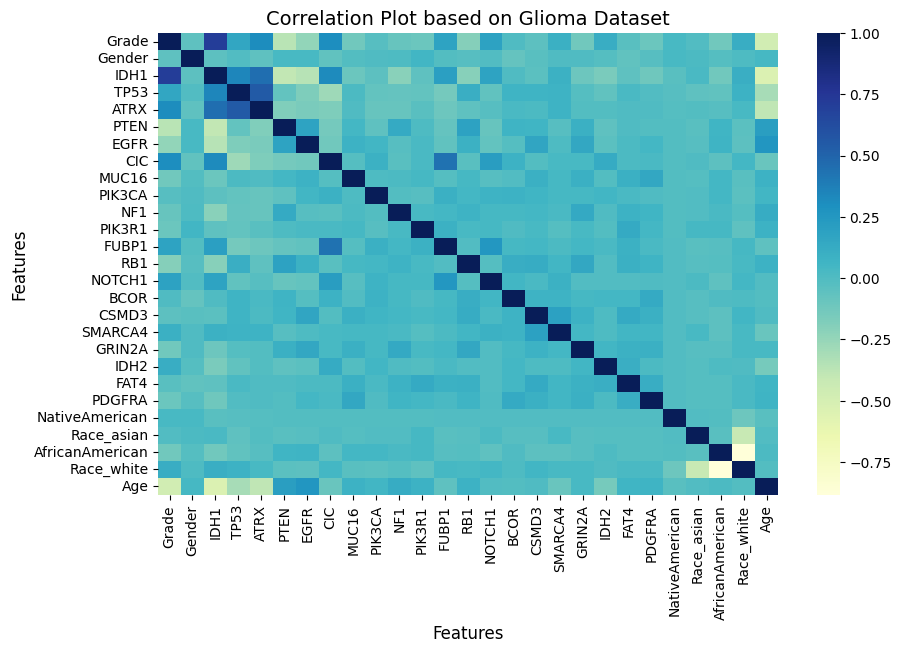

In [20]:
#========================Creating correlation matrix for the Glioma datastet==================================
columns = ['Grade', 'Gender', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR',
       'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA',
       'NativeAmerican', 'Race_asian', 'AfricanAmerican', 'Race_white', 'Age']

correlation_matrix = dataset[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()
#==========================================================================================================

In [18]:
def cal_rsquare(correlation_matrix, predictor, output):
    correlation_coefficient = correlation_matrix.loc[output, predictor]
    print(f'The correlation value of output variable {output} and predictor variable {predictor} is {correlation_coefficient}')
    r_square = correlation_coefficient ** 2
    print(f'The r-squared value of output variable {output} and predictor variable {predictor} is {r_square}')

In [21]:
cal_rsquare(correlation_matrix,'PTEN','Grade')

The correlation value of output variable Grade and predictor variable PTEN is -0.36742710323867395
The r-squared value of output variable Grade and predictor variable PTEN is 0.13500267619436315


In [20]:
cal_rsquare(correlation_matrix,'EGFR','Grade')

The correlation value of output variable Grade and predictor variable EGFR is -0.2417981553798286
The r-squared value of output variable Grade and predictor variable EGFR is 0.05846634794508773


In [21]:
cal_rsquare(correlation_matrix,'TP53','IDH1')

The correlation value of output variable IDH1 and predictor variable TP53 is 0.33959434899543556
The r-squared value of output variable IDH1 and predictor variable TP53 is 0.11532432186963368


In [22]:
cal_rsquare(correlation_matrix,'TP53','ATRX')

The correlation value of output variable ATRX and predictor variable TP53 is 0.547150596390344
The r-squared value of output variable ATRX and predictor variable TP53 is 0.29937377513030916


In [23]:
cal_rsquare(correlation_matrix,'IDH1','ATRX')

The correlation value of output variable ATRX and predictor variable IDH1 is 0.45380481822346996
The r-squared value of output variable ATRX and predictor variable IDH1 is 0.20593881304283662


In [24]:
cal_rsquare(correlation_matrix,'FUBP1','CIC')

The correlation value of output variable CIC and predictor variable FUBP1 is 0.43797807387055226
The r-squared value of output variable CIC and predictor variable FUBP1 is 0.19182479319135895


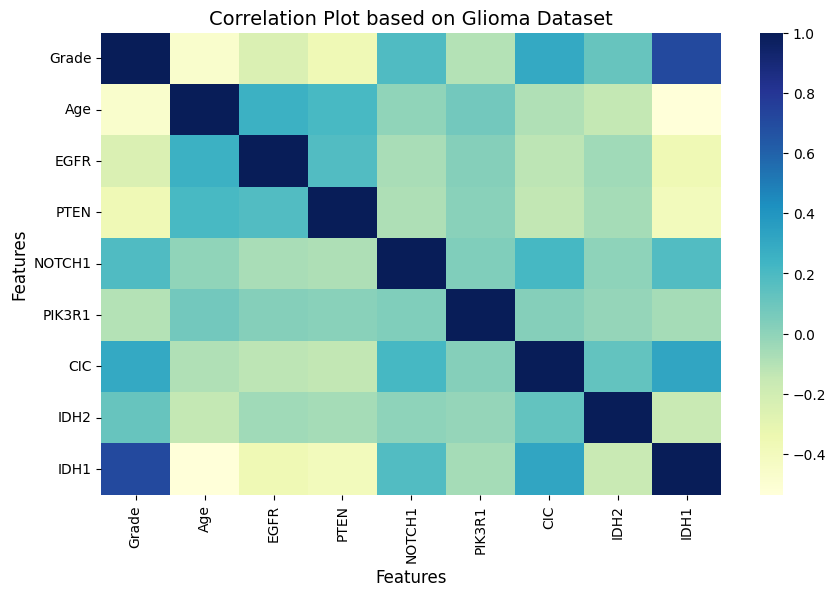

In [25]:
columns = ['Grade', 'Age','EGFR', 'PTEN', 'NOTCH1', 'PIK3R1', 'CIC', 'IDH2', 'IDH1']

correlation_matrix = dataset[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [25]:
#======================Import library to split the dataset into train and test data, GridSearchCV===========
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
#Importing KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#importing accuracy score, R square
from sklearn.metrics import accuracy_score, r2_score
#importing time
import time
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import tqdm as notebook_tqdm
import shap
#==========================================================================================================

c:\Users\abhie\OneDrive - Northeastern University\Glioma_Brain_Cancer_Prediction\Glioma_Prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
shap.initjs()

In [49]:
#==================Predictor Variables=====================================
X = dataset.drop(['Grade','Age_in_years'], axis = 1)
#===================Output Variable========================================
Y = dataset['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [29]:
from shap.maskers import Independent

In [53]:
#=================Logistic Regression Model================================================================
import warnings
clf_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_LR.fit(X_train, y_train)
# Stop the timer
end_time = time.time()
shap_values =''

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    explainer = shap.LinearExplainer(clf_LR, X, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_test)

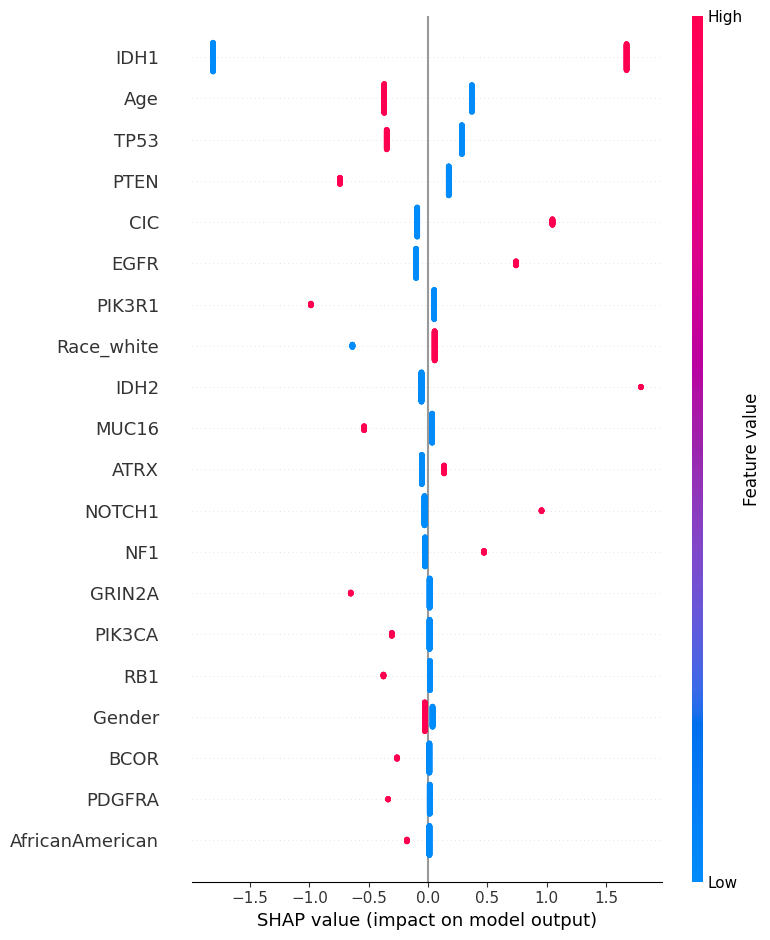

In [52]:
shap.summary_plot(shap_values,X_test)

In [32]:
# Making predictions on the testing data
y_pred_LR = clf_LR.predict(X_test)
# Calculate the execution time
execution_time = end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)
print("Logistic Regression Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
print("R-squared value:", r2)

Logistic Regression Accuracy: 0.8809523809523809
Excecution Time: 0.020186424255371094 seconds
R-squared value: 0.5127296165001612


<p>
    The value <b>0.8809523809523809</b>, expressed as a percentage, indicates that the logistic regression model's predictions are approximately <b>88.10%</b> accurate in explaining the variance in the target variable. The execution time is approximately <b>0.03546476364135742</b> seconds, which is a very short duration.
</p>

<p>
    For <b>class 0</b>: Precision is <b>0.81</b>. Out of all instances predicted as <b>class 0</b>, <b>81%</b> were correctly classified as <b>class 0</b>. For <b>class 1</b>: Precision is <b>0.95</b>. Out of all instances predicted as <b>class 1</b>, <b>95%</b> were correctly classified as class 1.
    For <b>class 0</b>: Precision is 0.81. Out of all instances predicted as class 0, 81% were correctly classified as class 0. For class 1: Precision is 0.95. Out of all instances predicted as class 1, 95% were correctly classified as class 1. For class 0: F1-score is 0.87, indicating a balance between precision and recall for class 0. For class 1: F1-score is 0.89, indicating a balance between precision and recall for class 1. The accuracy for this model is 0.88, or 88%, which means that 88% of the instances in the dataset were correctly classified.
 </p>

In [33]:
#=======================Classification Report based on Logistic Regression====================(By Abhishek)
report_LR = classification_report(y_test, y_pred_LR)
print(report_LR)
#===============================================================================================

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.95      0.84      0.89       145

    accuracy                           0.88       252
   macro avg       0.88      0.89      0.88       252
weighted avg       0.89      0.88      0.88       252



In [34]:
#============================Hyper-parameter tuning for Logistic Regression==============================
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l2']}
grid_search = GridSearchCV(clf_LR, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
#=======================================================================================================

Best hyperparameters: {'C': 1, 'penalty': 'l2'}


In [35]:
best_logistic_reg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], max_iter=10000)
best_logistic_reg.fit(X_train, y_train)
accuracy = best_logistic_reg.score(X_test, y_test)
print(f"Model accuracy with best hyperparameters: {accuracy}")

Model accuracy with best hyperparameters: 0.8809523809523809


<p>
    The analysis suggests that the model, likely a logistic regression model due to the 'penalty' hyperparameter, has been fine-tuned with the <b>'C'</b> and <b>'penalty'</b> hyperparameters. The combination of <b>'C = 1'</b> and <b>'penalty = 'l2'</b> resulted in the best model performance, achieving an accuracy of approximately <b>88.1%</b>.
</p>

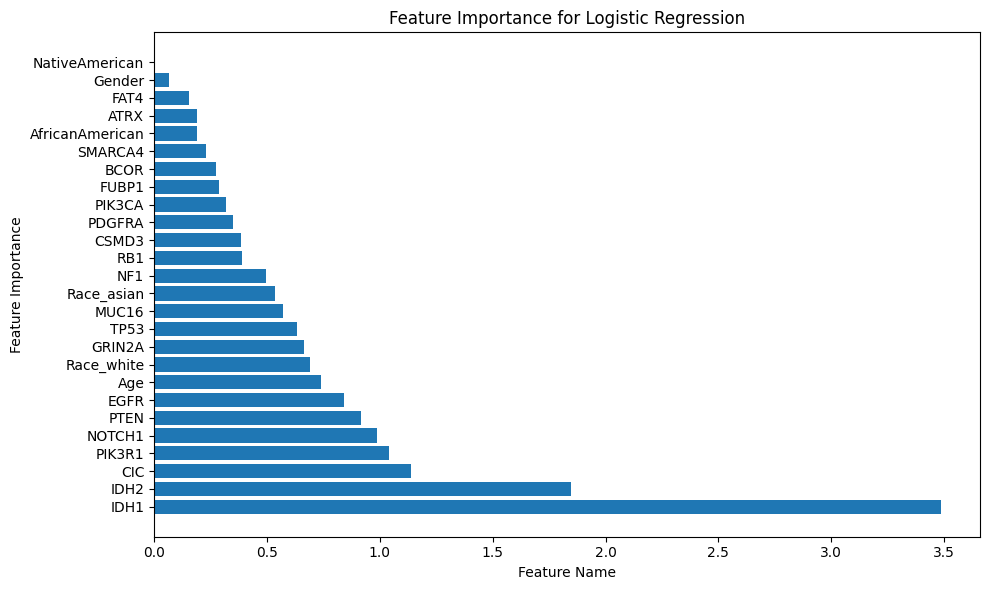

In [36]:
#======================Feature Importance based on Logistic Regression=========================================================================
# Create a figure and a set of subplots
# Get the coefficients
coefficients = clf_LR.coef_[0]

# Sort the coefficients by absolute value
sorted_coefficients = sorted(zip(X.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Create the feature importance graph
feature_names = [x[0] for x in sorted_coefficients]
feature_importances = [abs(x[1]) for x in sorted_coefficients]
plt.figure(figsize=(10, 6))
plt.barh(feature_names,feature_importances)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression')
plt.tight_layout()
plt.show()
#==========================================================================================================

<p>
    <b>"IDH1"</b> has a positive coefficient of approximately <b>3.480</b>. This suggests that an increase in the "IDH1" feature is associated with a significant positive impact on the model's predictions.
    <b>"PIK3R1"</b> has a negative coefficient of approximately <b>-1.034</b>. This implies that an increase in the "PIK3R1" feature has a negative influence on the model's predictions.
</p>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

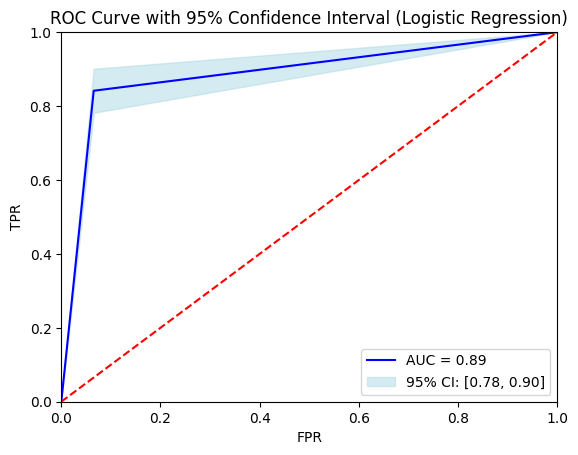

In [38]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc = auc(fpr, tpr)

# Calculate the standard error for the TPR (True Positive Rate)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve with 95% Confidence Interval (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

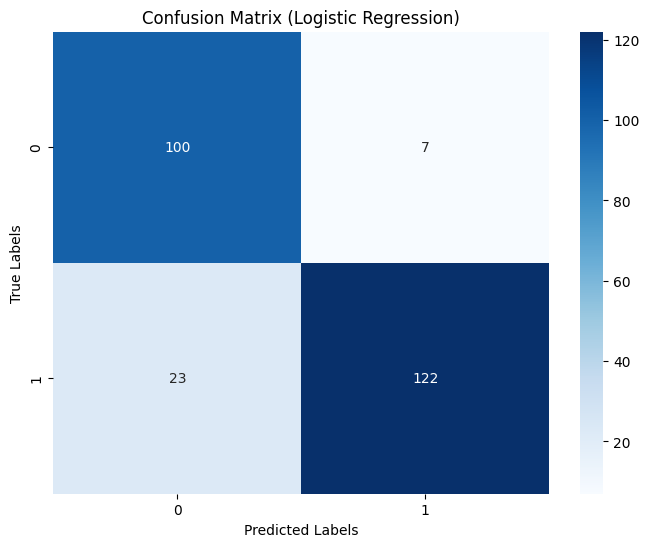

In [39]:
#=============================Calculate the confusion matrix on Logistic Regression========================
cm = confusion_matrix(y_test, y_pred_LR)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()
#=======================================================================================================

<p>
    <b>True Positives (TP)</b>: 100 instances were correctly predicted as positive.
    <b>False Negatives (FN)</b>: 7 instances were incorrectly predicted as negative, but they are actually positive.
    <b>False Positives (FP)</b>: 23 instances were incorrectly predicted as positive, but they are actually negative.
    <b>True Negatives (TN)</b>: 122 instances were correctly predicted as negative.
</p>

In [54]:
#==============================Import Random Forest Classifier=========================================
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_RF.fit(X_train, y_train)
# Making predictions on the testing data
y_pred_RF = clf_RF.predict(X_test)
# Stop the timer
end_time = time.time()
# Calculate the execution time
execution_time = end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_RF)
r2 = r2_score(y_test, y_pred_RF)
print("R-squared value:", r2)
print("Random Forest Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
#======================================================================================================

R-squared value: 0.4640025781501773
Random Forest Accuracy: 0.8690476190476191
Excecution Time: 0.2645251750946045 seconds


In [44]:
explainer_rf = shap.Explainer(clf_RF, X_test)
shap_values_rf = explainer_rf(X_test)

<p>
    An accuracy of <b>0.877</b> indicates that the Random Forest model correctly predicted the target variable for about <b>87.7%</b> of the instances in the dataset.The execution time is approximately <b>0.516</b> seconds.
</p>

In [45]:
shap_values_class_1 = shap_values_rf.values[..., 1]

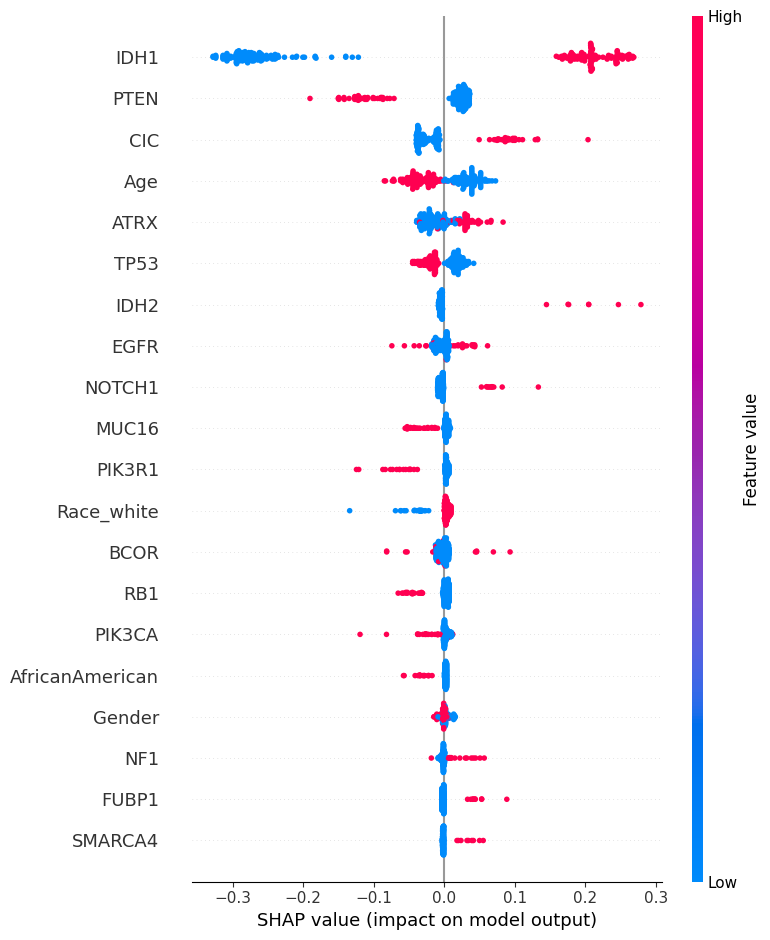

In [46]:
shap.summary_plot(shap_values_class_1, X_test)

In [47]:
#=========================Hyper-parameter Tuning of Random Forest=========================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=clf_RF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)
print("Best Hyperparameters: ", grid_search.best_params_)
#==========================================================================================================

Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [48]:
#======================Best Accuracy=============================
print("Best Accuracy: ", grid_search.best_score_)
#================================================================

Best Accuracy:  0.875


<p>
<b>Best Hyperparameters</b>
    <ul>
        <li>max_depth: The maximum depth of each decision tree in the random forest is set to 10.</li>
        <li>min_samples_split: The minimum number of samples required to split an internal node is set to 10.</li>
        <li>n_estimators: The number of decision trees in the random forest is set to 300.</li>
    </ul>
   The model's accuracy with the best hyperparameters is approximately <b>0.874, or 87.4%</b>
</p>

In [49]:
#=======================Classification Report based on Random Forest======================(By Abhishek)
report_RF = classification_report(y_test, y_pred_RF)
print(report_RF)
#===================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.94      0.83      0.88       145

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252



<p>
    For class 0: Precision is 0.80. Out of all instances predicted as class 0, 80% were correctly classified as class 0. For class 1: Precision is 0.94. Out of all instances predicted as class 1, 94% were correctly classified as class 1. For class 0: Recall is 0.93. Out of all actual class 0 instances, 93% were correctly predicted as class 0. For class 1: Recall is 0.83. Out of all actual class 1 instances, 83% were correctly predicted as class 1. The accuracy for this model is 0.87, or 87%, which means that 87% of the instances in the dataset were correctly classified.
</p>

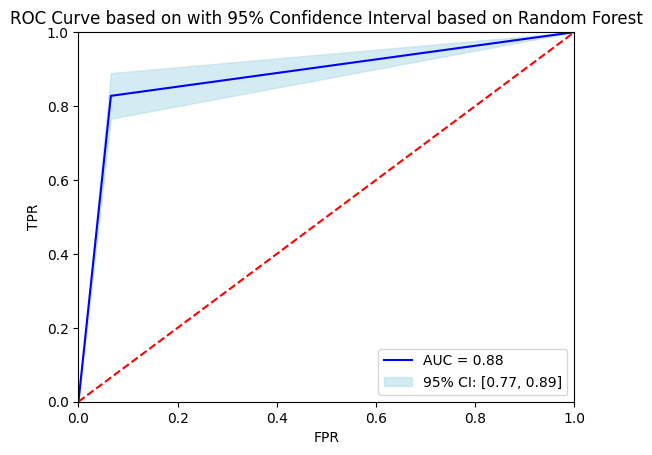

In [50]:
#=================Plotting ROC curve based on Random Forest====================(By Abhishek)
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr, tpr)

# Calculate the standard error for the TPR (True Positive Rate)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve based on with 95% Confidence Interval based on Random Forest')
plt.legend(loc='lower right')
plt.show()
#====================================================================================================

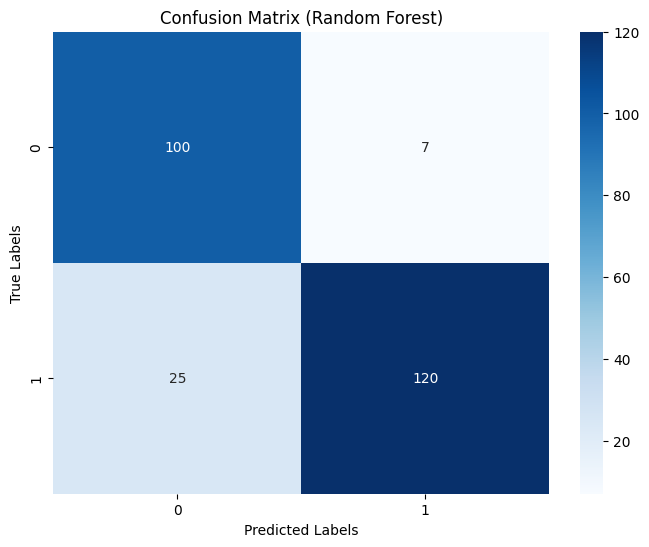

In [51]:
#=======================Calculate the confusion matrix for Random Forest====================================
cm = confusion_matrix(y_test, y_pred_RF)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()
#==========================================================================================================

<p>
    The model correctly identified <b>121</b> instances as positive <b>(class 1)</b>. The model correctly identified <b>100</b> instances as negative <b>(class 0)</b>. The model made <b>7</b> false positive errors, incorrectly classifying negative instances as positive. The model made <b>24</b> false negative errors, incorrectly classifying positive instances as negative.
</p>

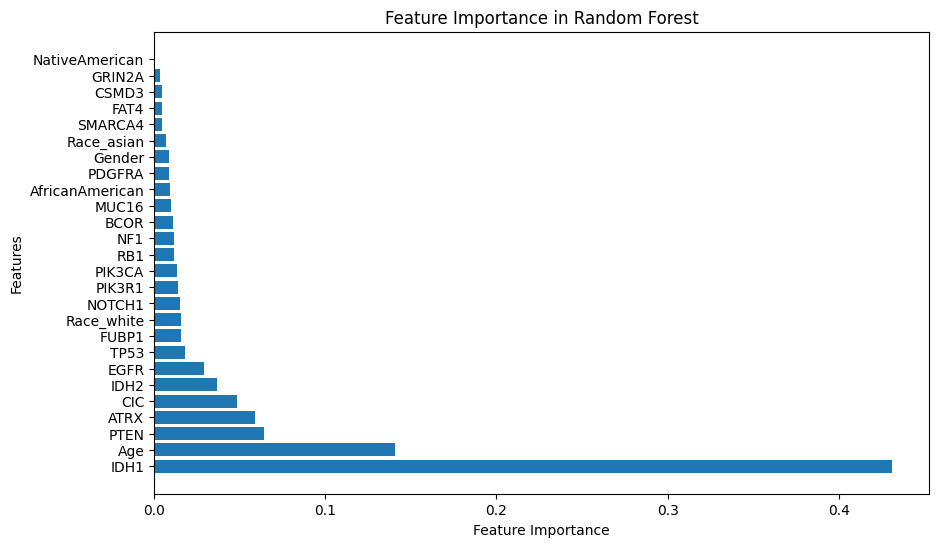

In [52]:
#=======================Feature Importance based on Random Forest Classifier===============================
feature_importances = clf_RF.feature_importances_
# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()
#==========================================================================================================

<p>
    <b>IDH1</b> feature has the highest importance score, with a value of approximately <b>42.48%</b>. This suggests that IDH1 is the most influential feature in the model's decision-making process. <b>Age:</b> Age is the second most important feature, with an importance score of approximately <b>14.61%</b>.
</p>

In [72]:
#==========================Import Support Vector Machine Library============================================
from sklearn.svm import SVC
clf_SVM = SVC(kernel='sigmoid', probability=True, C = 100, gamma='auto')
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_SVM.fit(X_train, y_train)
# Stop the timer
end_time = time.time()
explainer_svc = shap.KernelExplainer(clf_SVM.predict_proba, X_train)
shap_values_svc = explainer_svc(X_test)
# Making predictions on the testing data
y_pred_SVM = clf_SVM.predict(X_test)
# Calculate the execution time
execution_time = end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_SVM)
r2 = r2_score(y_test, y_pred_SVM)
print("R-squared value:", r2)
print("SVM Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
#=======================================================================================================

Using 588 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 252/252 [1:08:42<00:00, 16.36s/it]

R-squared value: 0.4802449242668386
SVM Accuracy: 0.873015873015873
Excecution Time: 0.09849977493286133 seconds


<p>
    In this case, the SVM model achieved an accuracy of approximately 87.30%. This means that about 87.30% of the instances in the dataset were correctly classified by the SVM model. The time is measured in seconds. In this case, the SVM model took approximately 0.077 seconds (or 77.47 milliseconds) to complete the specified task
    </p>

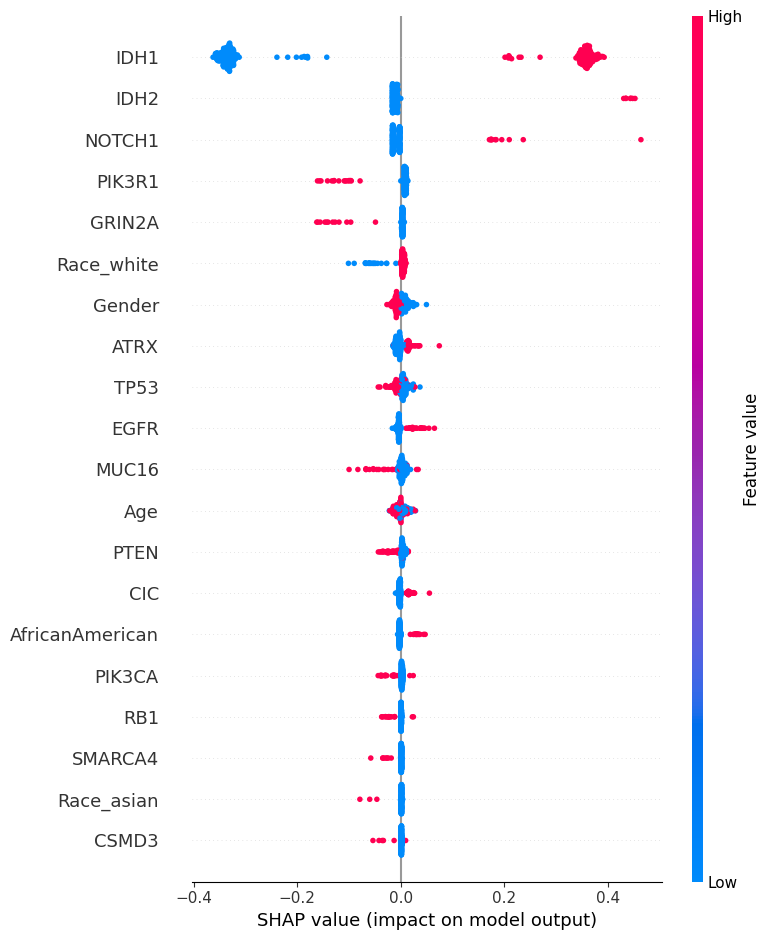

In [75]:
shap_values_svc_class_1 = shap_values_svc.values[..., 1]
shap.summary_plot(shap_values_svc_class_1, X_test)

In [76]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
}
grid_search = GridSearchCV(estimator=clf_SVM, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy CV:", accuracy)
print("Best Params:", best_params)
print("Best Estimator:", best_model)

SVM Accuracy CV: 0.873015873015873
Best Params: {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Estimator: SVC(C=100, gamma='auto', kernel='sigmoid', probability=True)


In [77]:
#=======================Classification Report based on Support Vector Machine=================(By Abhishek)
report_SVM = classification_report(y_test, y_pred_SVM)
print(report_SVM)
#=================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.94      0.83      0.88       145

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252



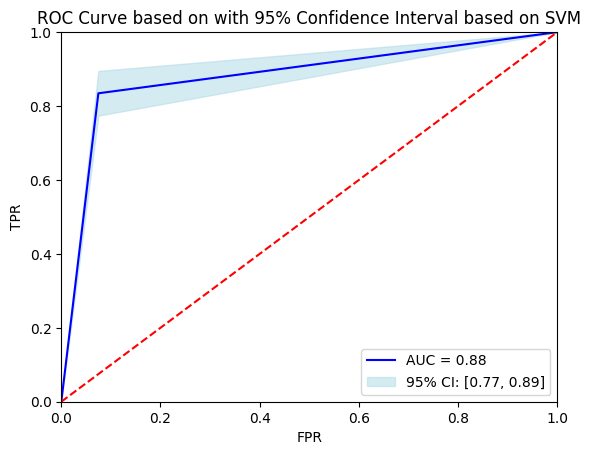

In [78]:
#=================Plotting ROC curve based on Support Vector Machine====================(By Abhishek)
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc = auc(fpr, tpr)

# Calculate the standard error for the TPR (True Positive Rate)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve based on with 95% Confidence Interval based on SVM')
plt.legend(loc='lower right')
plt.show()
#====================================================================================================

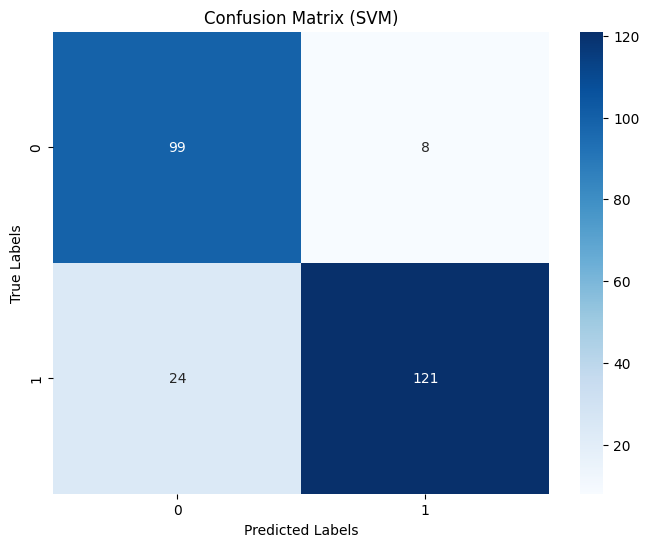

In [79]:
#=======================Calculate the confusion matrix for Confusion Matrix====================================
cm = confusion_matrix(y_test, y_pred_SVM)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()
#==========================================================================================================

<p>
    The model correctly identified 121 instances as positive (class 1). The model correctly identified 99 instances as negative (class 0). The model made 8 false positive errors, incorrectly classifying negative instances as positive. The model made 24 false negative errors, incorrectly classifying positive instances as negative.
</p>

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)

In [29]:
#================================Importing Adaptive Boosting Classifier library============================
from sklearn.ensemble import AdaBoostClassifier
clf_AB = AdaBoostClassifier(clf_RF, n_estimators=10, learning_rate=1,algorithm='SAMME')
# Start the timer
start_time = time.time()
# Fitting the classifier to the training data
clf_AB.fit(X_train, y_train)
# Stop the timer
end_time = time.time()
# Making predictions on the testing data
y_pred_AB = clf_AB.predict(X_test)
# Calculate the execution time
execution_time= end_time - start_time
# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_AB)
r2 = r2_score(y_test, y_pred_AB)
print("R-squared value:", r2)
print("AdaBoost Accuracy:", accuracy)
print(f"Excecution Time: {execution_time} seconds")
#==========================================================================================================

R-squared value: 0.4802449242668386
AdaBoost Accuracy: 0.873015873015873
Excecution Time: 2.823612928390503 seconds


<p>
    The AdaBoost model achieved an accuracy of approximately 87.30%. In this case, the AdaBoost model took approximately 5.878 seconds to complete the specified task.
   </p>

In [59]:
#=======================Classification Report based on AdaBoost Classifier====================(By Abhishek)
report_AB = classification_report(y_test, y_pred_AB)
print(report_AB)
#======================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.94      0.83      0.88       145

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252



<p>
    In this report, for class 1, the <b>precision</b> is 0.94, indicating that 94% of the instances predicted as class 1 were actually class 1. For class 0, the precision is 0.80, meaning that 80% of the instances predicted as class 0 were actually class 0.
    
In this report, for class 1, the <b>recall</b> is 0.83, indicating that 83% of the actual class 1 instances were correctly classified as class 1. For class 0, the recall is 0.93, meaning that 93% of the actual class 0 instances were correctly classified as class 0.

For class 1, the F1-score is 0.88, and for class 0, the F1-score is 0.86.
</p>

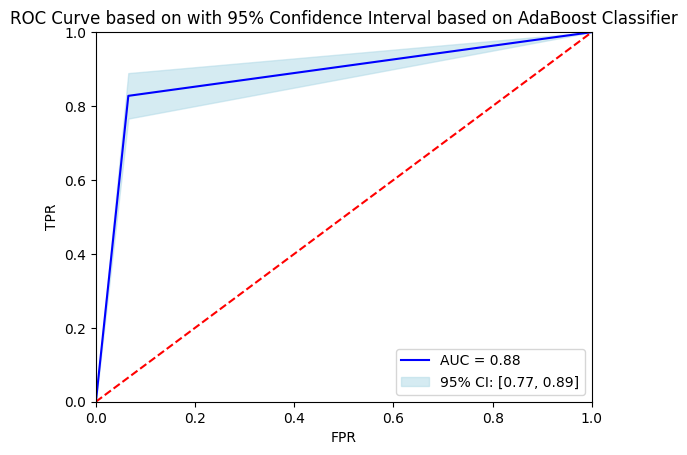

In [60]:
#=================Plotting ROC curve based on AdaBoost Classifier====================(By Abhishek)
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_AB)
roc_auc = auc(fpr, tpr)
# Standard error formula for TPR
std_err = np.sqrt((tpr * (1 - tpr)) / y_test.sum())

# Compute the confidence interval
confidence_level = 0.95
z_score = 1.96  # corresponds to a 95% confidence interval
upper_bound = tpr + std_err * z_score
lower_bound = tpr - std_err * z_score

# Plot the ROC curve with confidence interval
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,
                 label=f'95% CI: [{lower_bound[1]:.2f}, {upper_bound[1]:.2f}]')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve based on with 95% Confidence Interval based on AdaBoost Classifier')
plt.legend(loc='lower right')
plt.show()
#====================================================================================================

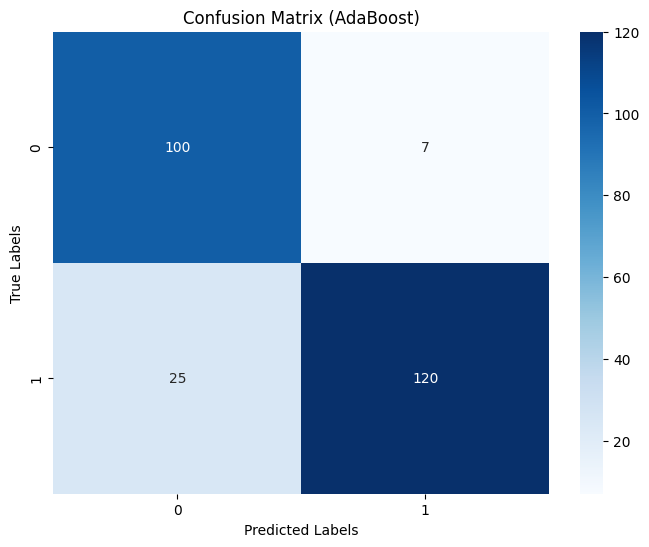

In [61]:
#=======================Calculate the confusion matrix for AdaBoost====================================
cm = confusion_matrix(y_test, y_pred_AB)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()
#==========================================================================================================

<p>
     In the matrix, there are 120 true positives.  In the matrix, there are 120 true positives.  In the matrix, there are 120 true positives.  In the matrix, there are 25 false negatives.
   </p>

In [47]:
#==================Predictor Variables=====================================
X = dataset[['Age','EGFR', 'PTEN', 'NOTCH1', 'PIK3R1', 'CIC', 'IDH2', 'IDH1']]
#X = dataset.drop(['Grade','Age_in_years'], axis = 1)
#===================Output Variable========================================
Y = dataset['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

In [48]:
train_set = [ 0.1, 0.05, 0.02, 0.01]

In [49]:
#=====================Logistic Regression Model with different training sets================
lr_pred_ls = []
for elm in train_set:
    clf_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_LR.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_LR = clf_LR.predict(X_test)
    lr_pred_ls.append(y_pred_LR)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_LR)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Logistic Regression Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Logistic Regression model) with {elm*100}% training records is {execution_time} seconds \n')

Accuracy score(Logistic Regression Model): 0.8571428571428571 with 10.0% training records
Execution Time (Logistic Regression model) with 10.0% training records is 0.0 seconds 

Accuracy score(Logistic Regression Model): 0.8571428571428571 with 5.0% training records
Execution Time (Logistic Regression model) with 5.0% training records is 0.003770112991333008 seconds 

Accuracy score(Logistic Regression Model): 0.8571428571428571 with 2.0% training records
Execution Time (Logistic Regression model) with 2.0% training records is 0.002669095993041992 seconds 

Accuracy score(Logistic Regression Model): 0.7341269841269841 with 1.0% training records
Execution Time (Logistic Regression model) with 1.0% training records is 0.004063129425048828 seconds 



In [50]:
count = 0

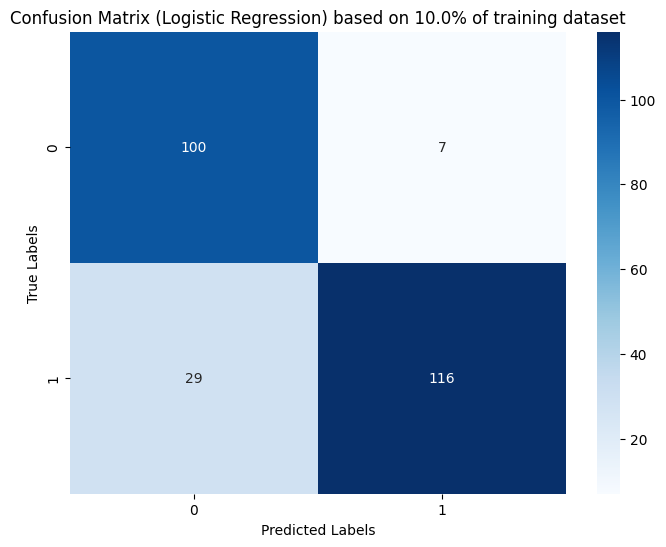

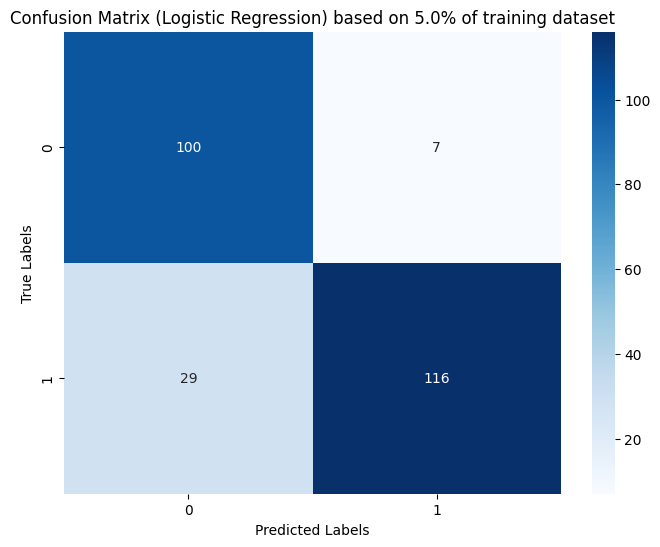

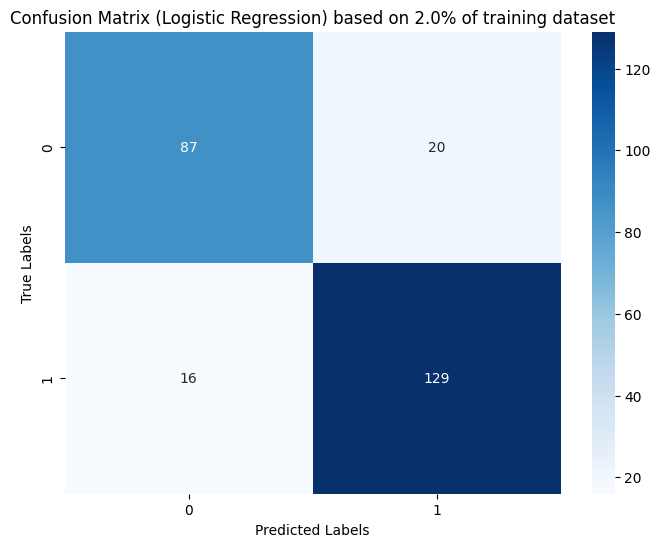

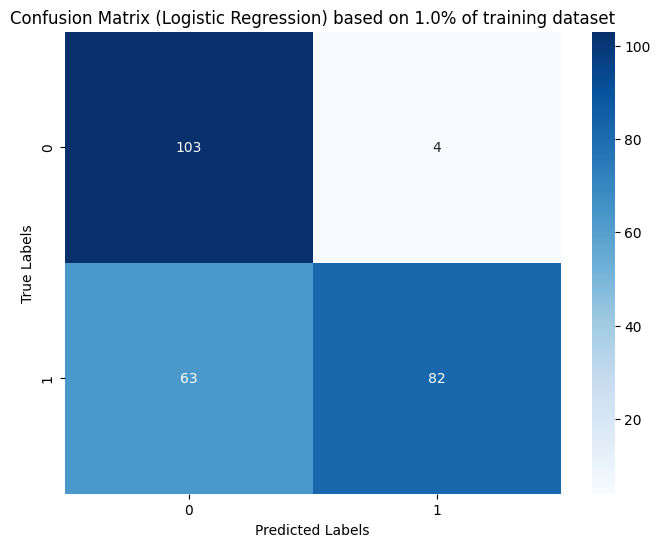

In [51]:
#=======================Calculate the confusion matrix for Logistic Regression Model====================================
for pred in lr_pred_ls:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Logistic Regression) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [52]:
count = 0

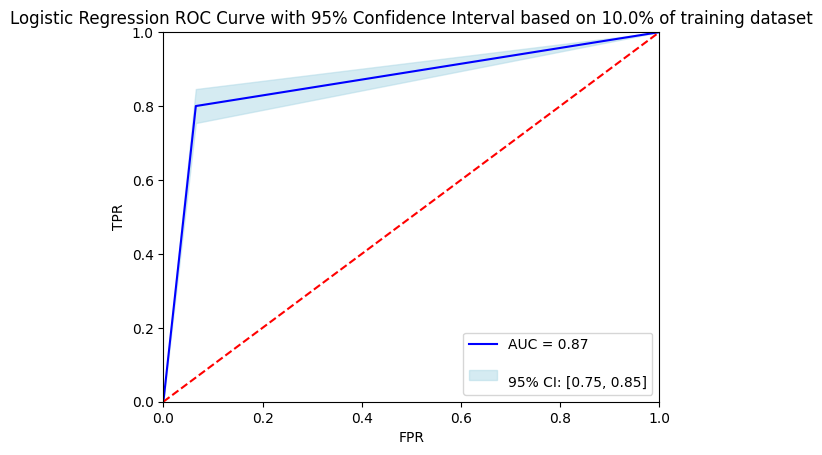

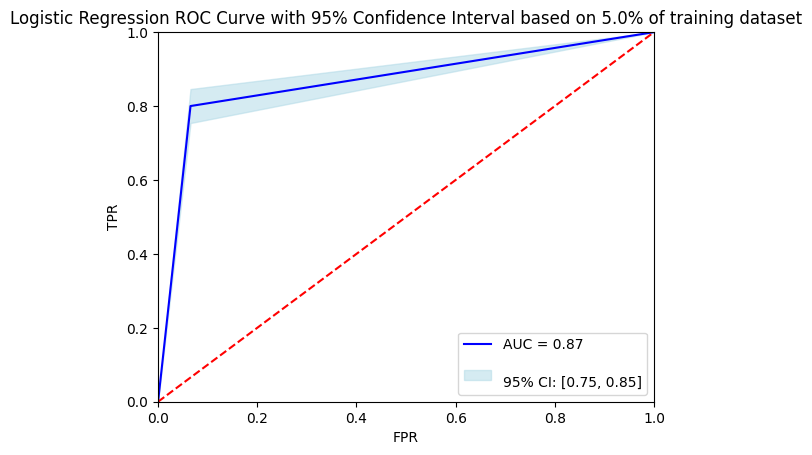

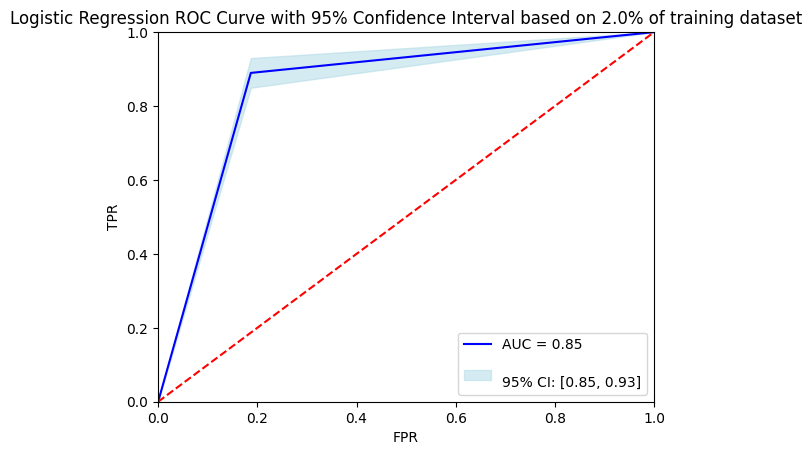

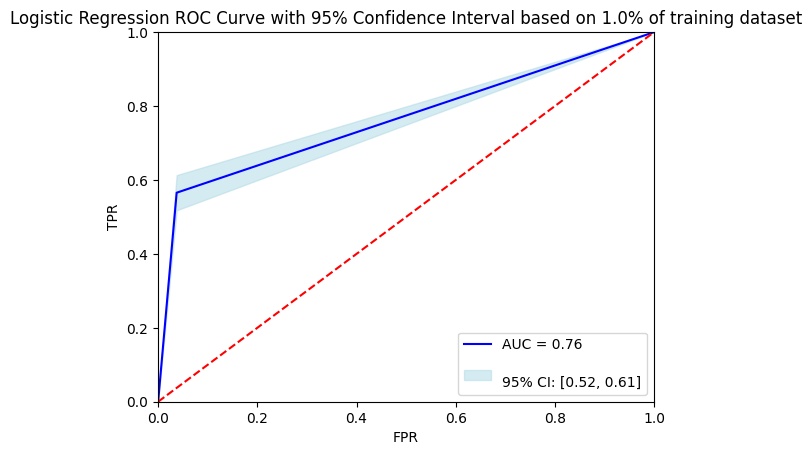

In [53]:
#=================Plotting ROC curve based on Logistic Regression====================(By Abhishek)
for pred in lr_pred_ls:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Logistic Regression ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [54]:
#=====================Random Forest Model with different training sets=====================
from sklearn.ensemble import RandomForestClassifier
rf_pred_ls = []
for elm in train_set:
    clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_RF.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_RF = clf_RF.predict(X_test)
    rf_pred_ls.append(y_pred_RF)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_RF)
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f'Accuracy score(Random Forest Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Random Forest model) with {elm*100}% training records is {execution_time} seconds \n')
#=======================================================================================================

Accuracy score(Random Forest Model): 0.8531746031746031 with 10.0% training records
Execution Time (Random Forest model) with 10.0% training records is 0.2423722743988037 seconds 

Accuracy score(Random Forest Model): 0.8571428571428571 with 5.0% training records
Execution Time (Random Forest model) with 5.0% training records is 0.28322696685791016 seconds 

Accuracy score(Random Forest Model): 0.5753968253968254 with 2.0% training records
Execution Time (Random Forest model) with 2.0% training records is 0.2346808910369873 seconds 

Accuracy score(Random Forest Model): 0.4246031746031746 with 1.0% training records
Execution Time (Random Forest model) with 1.0% training records is 0.21680116653442383 seconds 



In [55]:
count = 0

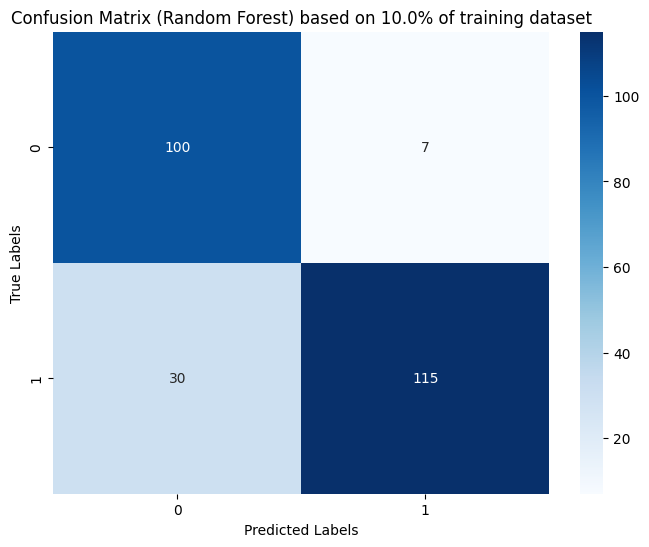

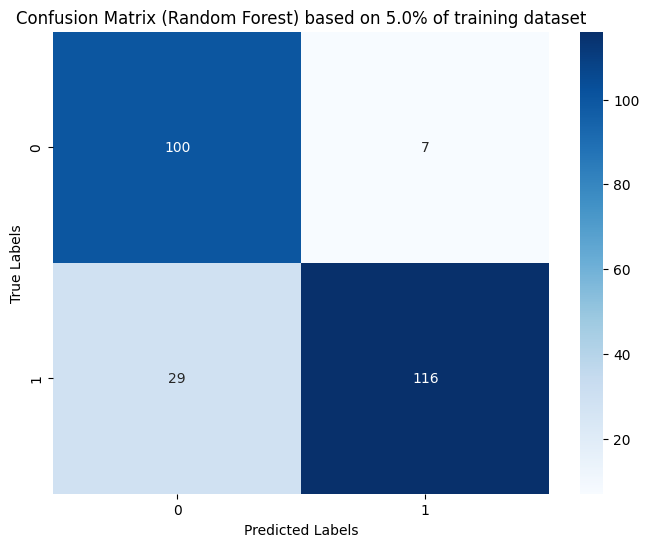

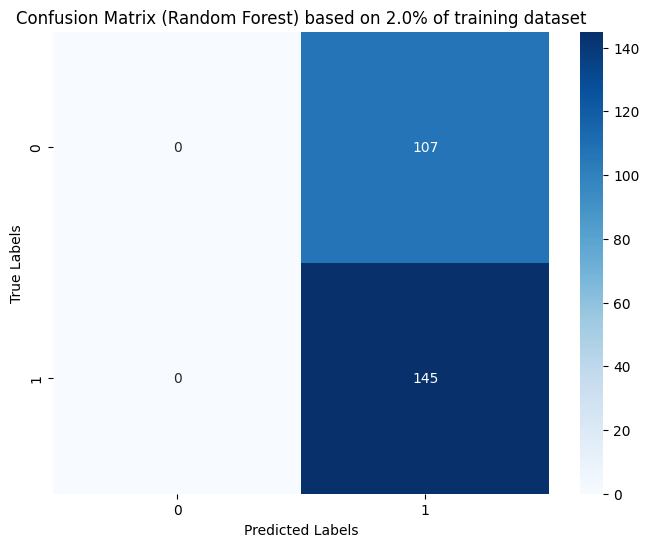

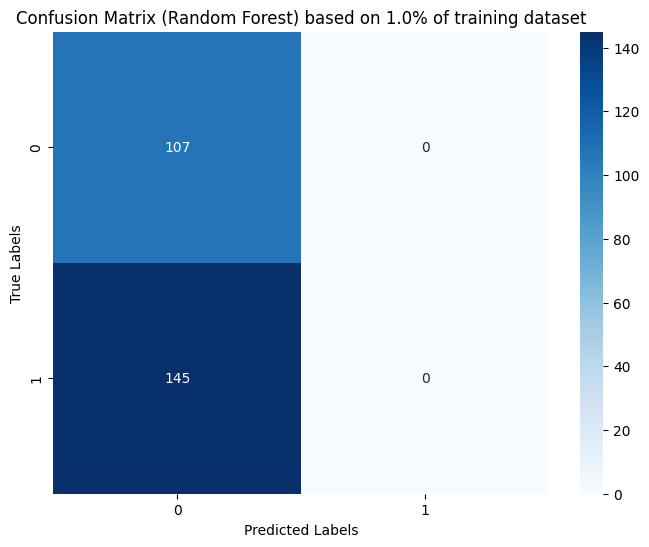

In [56]:
#=======================Calculate the confusion matrix for Random Forest Model====================================
for pred in rf_pred_ls:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Random Forest) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [57]:
count = 0

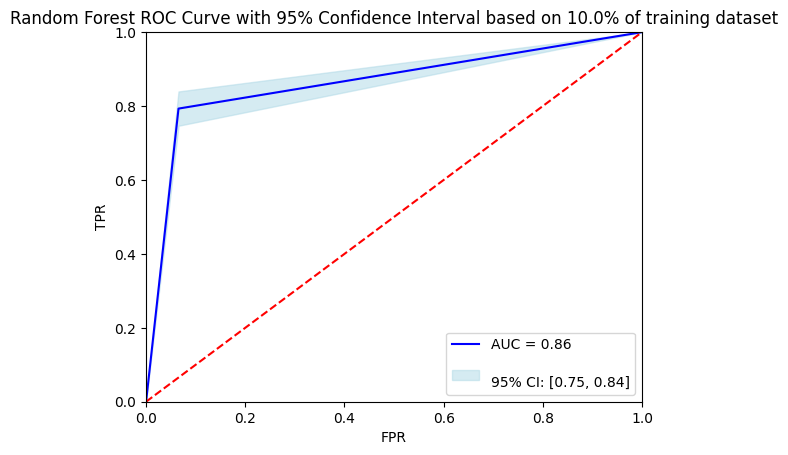

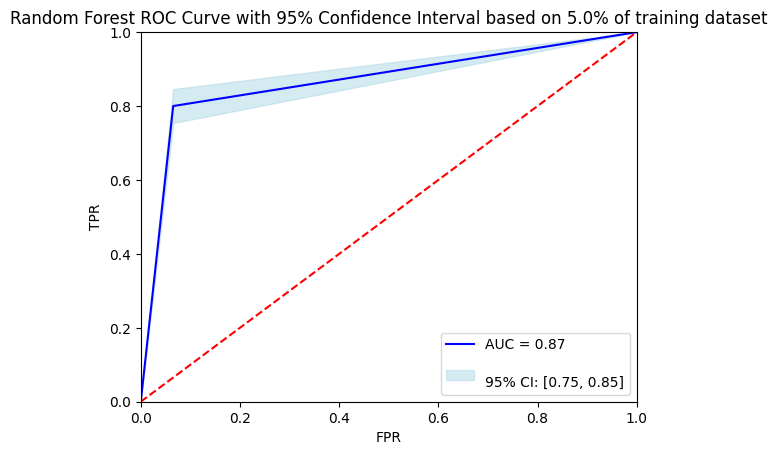

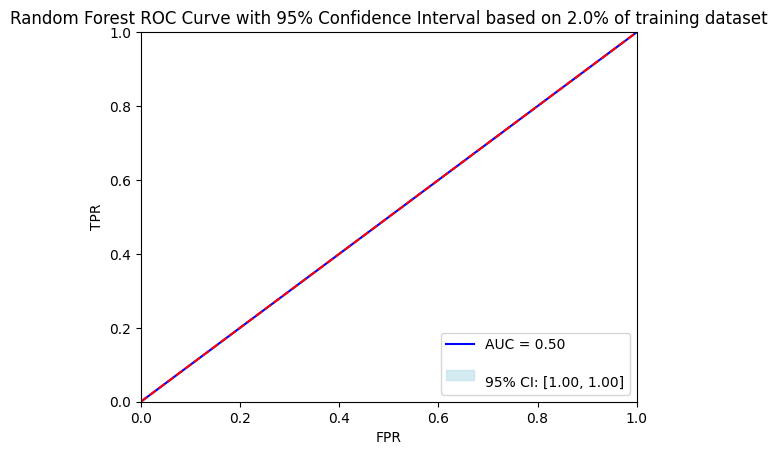

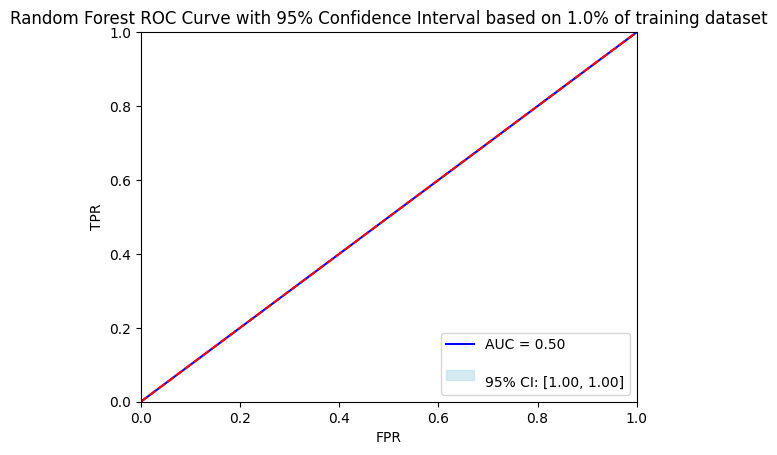

In [58]:
#=================Plotting ROC curve based on Random Forest====================(By Abhishek)
for pred in rf_pred_ls:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Random Forest ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

In [59]:
#=====================Support Vector Machine Model with different training sets=====================
from sklearn.svm import SVC
svm_pred_ls = []
for elm in train_set:
    clf_SVM = SVC(kernel='sigmoid', probability=True, C = 100, gamma='auto')
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    clf_SVM.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_SVM = clf_SVM.predict(X_test)
    svm_pred_ls.append(y_pred_SVM)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_SVM)
    # Calculate the execution time
    execution_time = end_time - start_time
    r2 = r2_score(y_test, y_pred_SVM)
    print("R-squared value:", r2)
    print(f'Accuracy score(Support Vector Machine Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (Support Vectior Machine Model) with {elm*100}% training records is {execution_time} seconds \n')

R-squared value: 0.36654850145020956
Accuracy score(Support Vector Machine Model): 0.8452380952380952 with 10.0% training records
Execution Time (Support Vectior Machine Model) with 10.0% training records is 0.004224300384521484 seconds 

R-squared value: 0.36654850145020956
Accuracy score(Support Vector Machine Model): 0.8452380952380952 with 5.0% training records
Execution Time (Support Vectior Machine Model) with 5.0% training records is 0.0 seconds 

R-squared value: 0.36654850145020956
Accuracy score(Support Vector Machine Model): 0.8452380952380952 with 2.0% training records
Execution Time (Support Vectior Machine Model) with 2.0% training records is 0.0038619041442871094 seconds 

R-squared value: 0.4315178859168548
Accuracy score(Support Vector Machine Model): 0.8611111111111112 with 1.0% training records
Execution Time (Support Vectior Machine Model) with 1.0% training records is 0.0016040802001953125 seconds 



In [60]:
count = 0

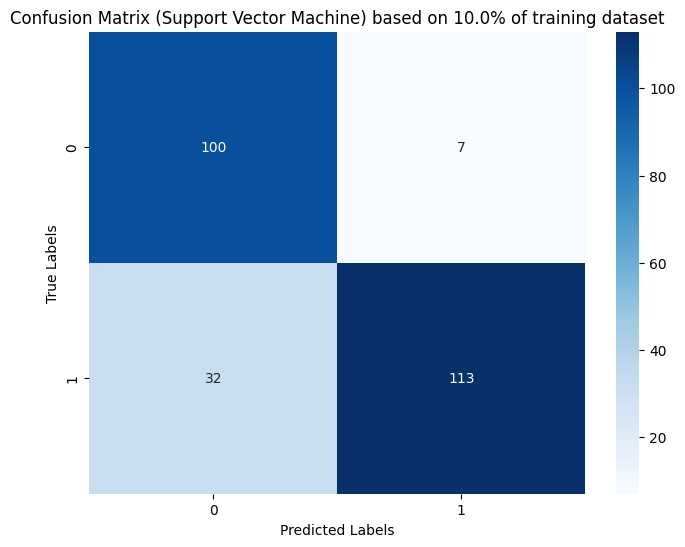

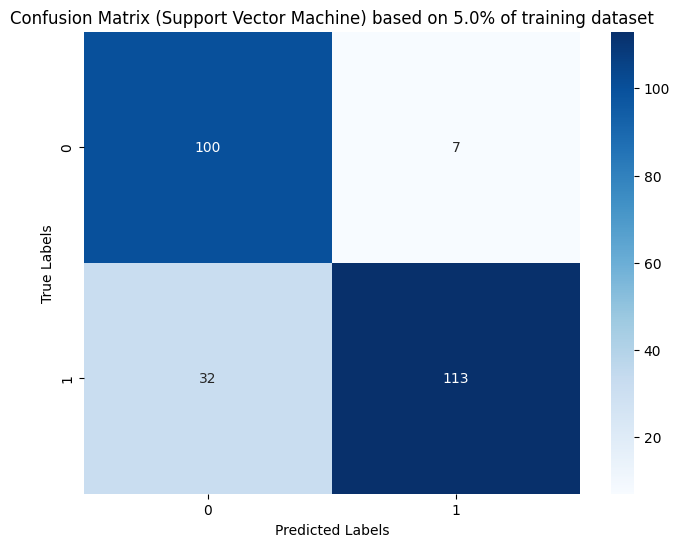

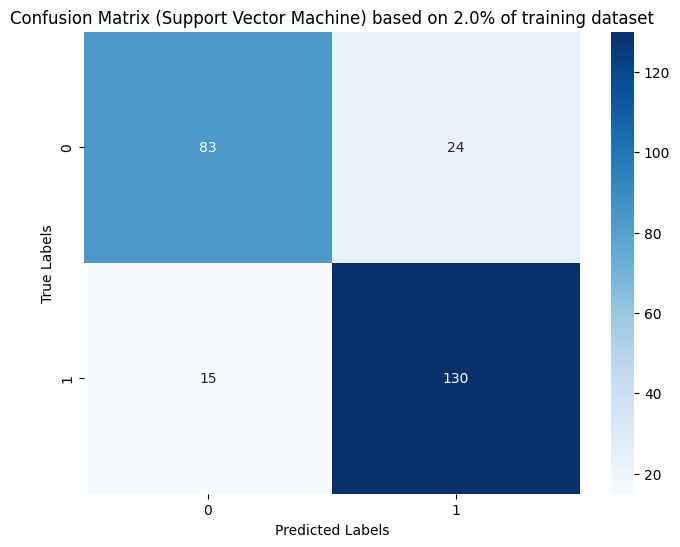

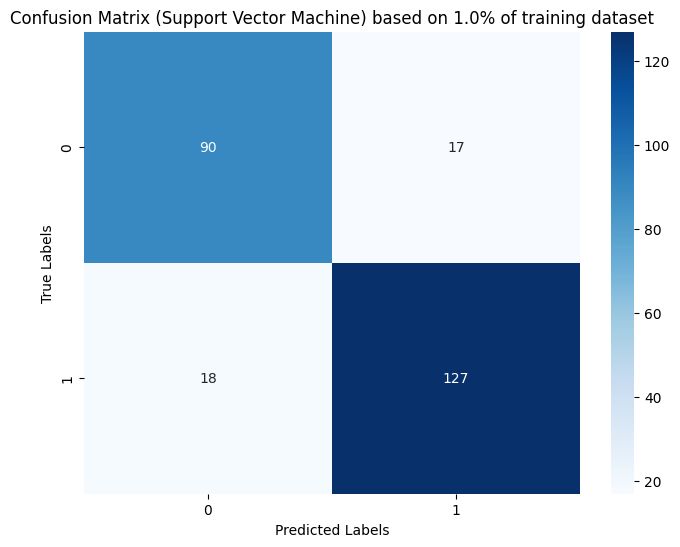

In [61]:
#=======================Calculate the confusion matrix for Support Vector Machine Model====================================
for pred in svm_pred_ls:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Support Vector Machine) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [62]:
count = 0

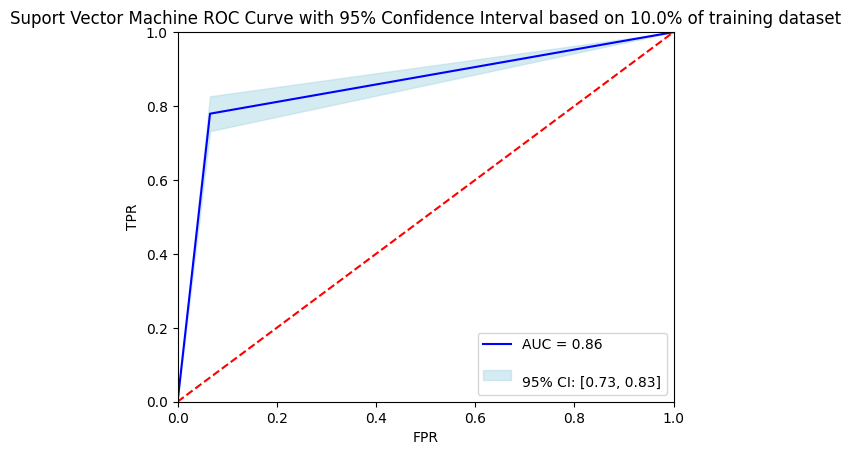

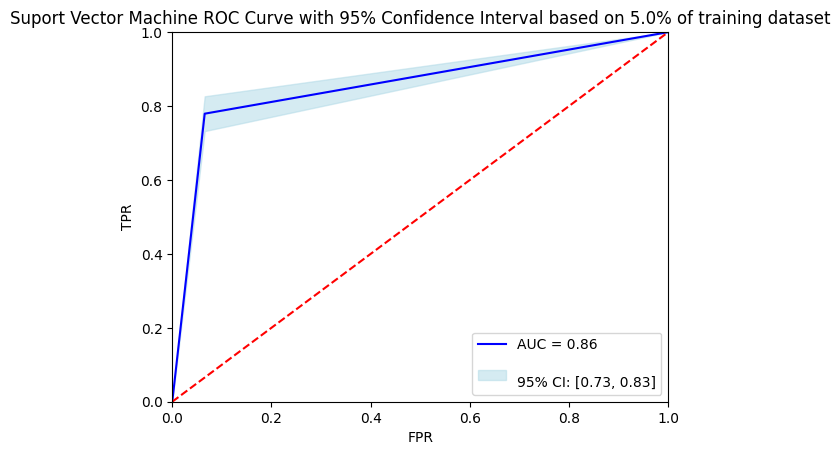

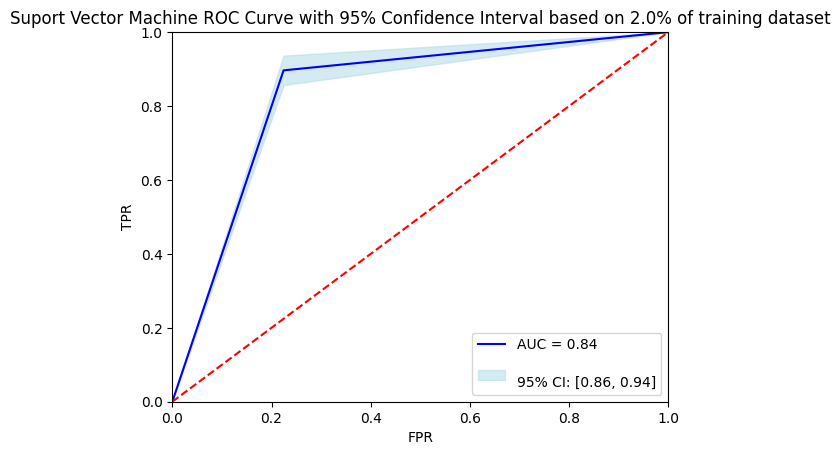

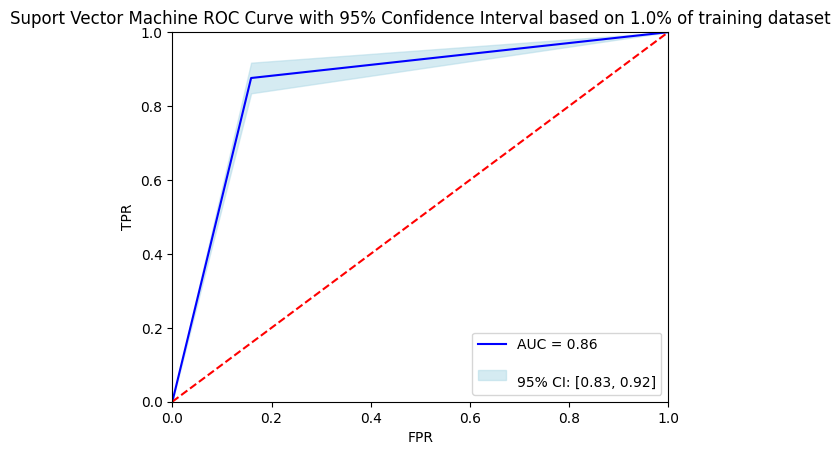

In [63]:
#=================Plotting ROC curve based on Suport Vector Machine====================(By Abhishek)
for pred in svm_pred_ls:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Suport Vector Machine ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

In [66]:
#=====================================QSVC Model==========================================
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

algorithm_globals.random_seed = 123
features = MinMaxScaler().fit_transform(X)

labels = Y
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)
num_features = features.shape[1]

adhoc_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map, enforce_psd = False)
# qsvc = QSVC(quantum_kernel=adhoc_kernel)
pred_qsvctask1 = []
for elm in train_set:
    qsvc = QSVC(quantum_kernel=adhoc_kernel)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # Fitting the classifier to the training data
    qsvc.fit(X_t, y_t)
    #End Time
    end_time = time.time()
    # Making predictions on the testing data
    y_pred_qvsc = qsvc.predict(X_test)
    pred_qsvctask1.append(y_pred_qvsc)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_qvsc)
    # Calculate the execution time
    execution_time = end_time - start_time
    r2 = r2_score(y_test, y_pred_qvsc)
    print(f"R-squared value with {elm*100}% training records is ", r2)
    print(f'Accuracy score of the QSVC Model is {accuracy} with {elm*100}% training records')
    print(f'Execution Time of QSVC Model with {elm*100}% training records is {execution_time} seconds \n')

R-squared value with 10.0% training records is  0.31782146310022574
Accuracy score of the QSVC Model is 0.8333333333333334 with 10.0% training records
Execution Time of QSVC Model with 10.0% training records is 18.70317006111145 seconds 

R-squared value with 5.0% training records is  0.2690944247502418
Accuracy score of the QSVC Model is 0.8214285714285714 with 5.0% training records
Execution Time of QSVC Model with 5.0% training records is 3.90682053565979 seconds 

R-squared value with 2.0% training records is  -0.3156300354495647
Accuracy score of the QSVC Model is 0.6785714285714286 with 2.0% training records
Execution Time of QSVC Model with 2.0% training records is 0.5491366386413574 seconds 

R-squared value with 1.0% training records is  -0.4942958427328388
Accuracy score of the QSVC Model is 0.6349206349206349 with 1.0% training records
Execution Time of QSVC Model with 1.0% training records is 0.11336326599121094 seconds 



In [67]:
count = 0

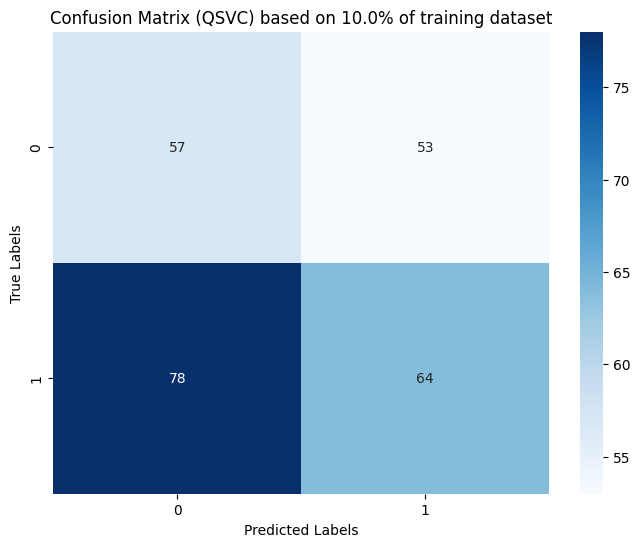

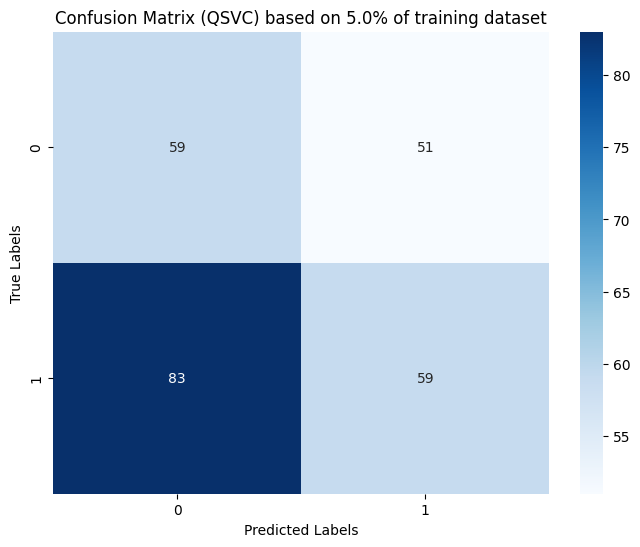

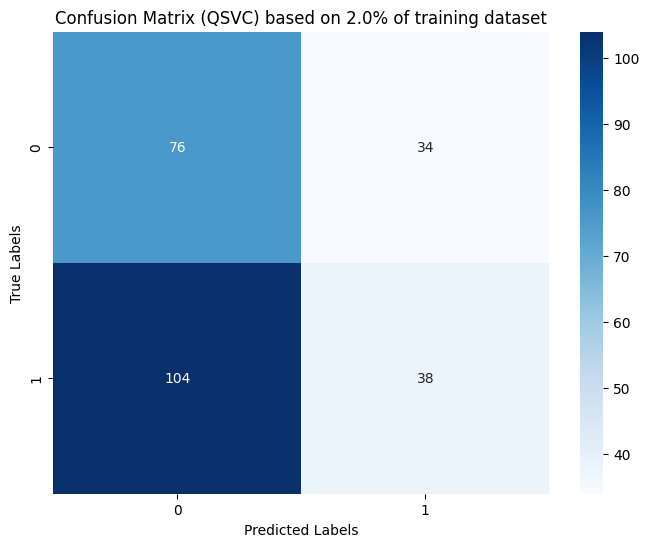

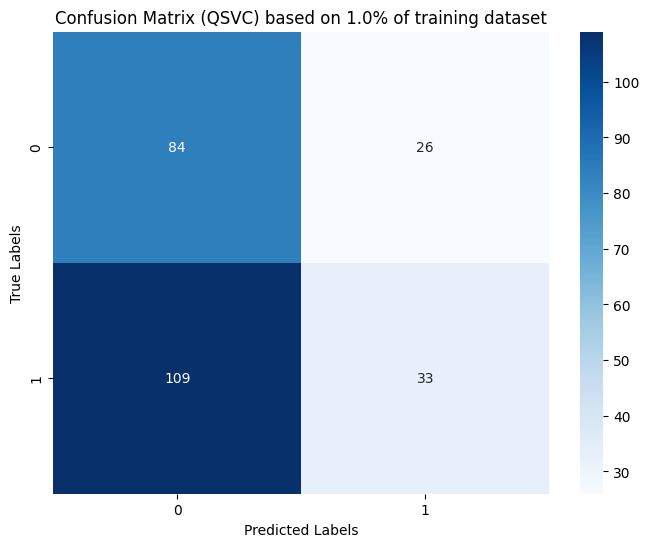

In [68]:
#=======================Calculate the confusion matrix for QSVC Model====================================
for pred in pred_qsvctask1:
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (QSVC) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [69]:
count = 0

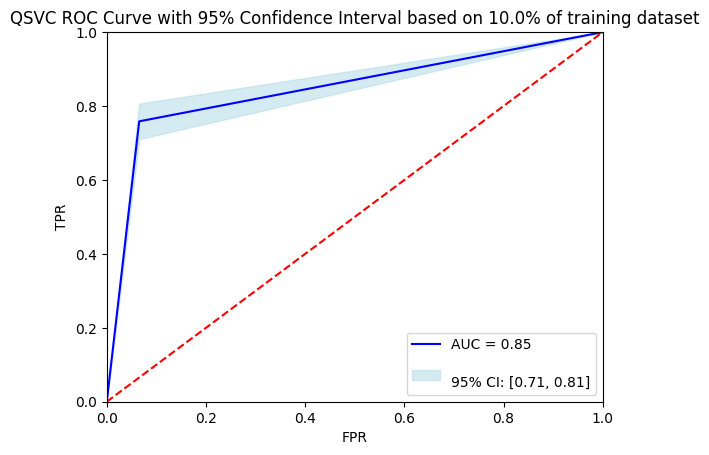

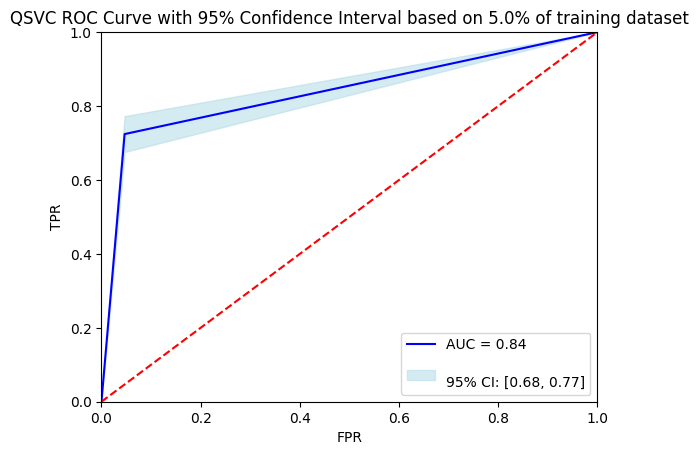

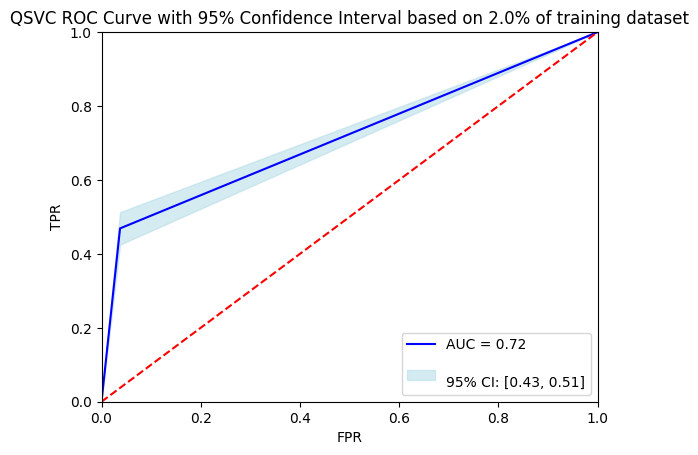

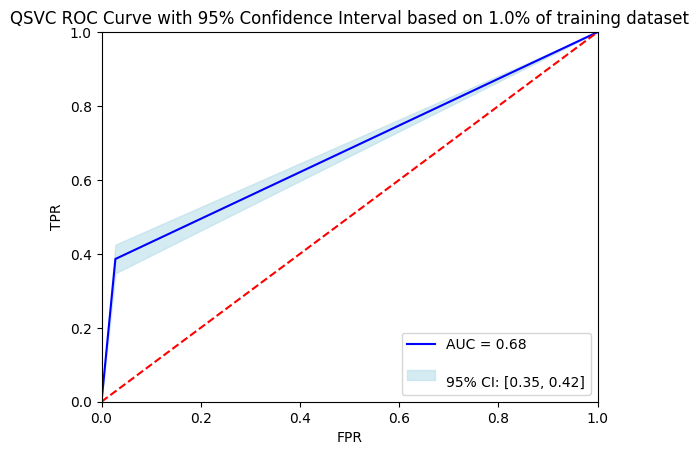

In [70]:
#=================Plotting ROC curve based on QSVC====================(By Abhishek)
from sklearn.metrics import roc_curve, roc_auc_score, auc
for pred in pred_qsvctask1:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'QSVC ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [71]:
#=====================Vector Quantum Classifier Model with different training sets================
from sklearn.metrics import roc_curve, roc_auc_score, auc
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
import qiskit_algorithms.optimizers as op
from qiskit.circuit.library import EfficientSU2, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

algorithm_globals.random_seed = 123
features = MinMaxScaler().fit_transform(X)
labels = Y
num_features = features.shape[1]
adhoc_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

In [72]:
# ansatz = EfficientSU2(num_qubits=num_features, su2_gates=qc, entanglement = 'full', reps=1)

In [73]:
ansatz = RealAmplitudes(num_features, entanglement='full', reps=3)

In [74]:
optimizer = op.COBYLA(maxiter=350)

In [75]:
sampler = Sampler()

In [76]:
vqc = VQC(
    sampler=sampler,
    feature_map=adhoc_feature_map,
    ansatz=ansatz,
    loss = 'cross_entropy',
    optimizer=optimizer
)
#clear objective value history
objective_func_vals = []
pred_vqtask1 = []
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    vqc.fit(X_t, y_t.values)
    #End Time
    end_time = time.time()
    #accuracy = vqc.score(test_features, test_labels.values)
    pred = vqc.predict(X_test)
    accuracy = accuracy_score(y_test.values, pred)
    pred_vqtask1.append(pred)
    #Calculate the execution time
    execution_time = end_time - start_time
    r2 = r2_score(y_test.values, pred)
    print(f"R-squared value with {elm*100}% training records is ", r2)
    print(f'Accuracy score(VQC Model): {accuracy} with {elm*100}% training records')
    print(f'Execution Time (VQC model) with {elm*100}% training records is {execution_time} seconds \n')
#======================================VQC=================================================

R-squared value with 10.0% training records is  0.20412504028359668
Accuracy score(VQC Model): 0.8055555555555556 with 10.0% training records
Execution Time (VQC model) with 10.0% training records is 4119.894894599915 seconds 

R-squared value with 5.0% training records is  0.3827908475668709
Accuracy score(VQC Model): 0.8492063492063492 with 5.0% training records
Execution Time (VQC model) with 5.0% training records is 171.72673559188843 seconds 

R-squared value with 2.0% training records is  0.4802449242668386
Accuracy score(VQC Model): 0.873015873015873 with 2.0% training records
Execution Time (VQC model) with 2.0% training records is 67.4958348274231 seconds 

R-squared value with 1.0% training records is  -0.23441830486625825
Accuracy score(VQC Model): 0.6984126984126984 with 1.0% training records
Execution Time (VQC model) with 1.0% training records is 32.453938484191895 seconds 



In [77]:
count = 0

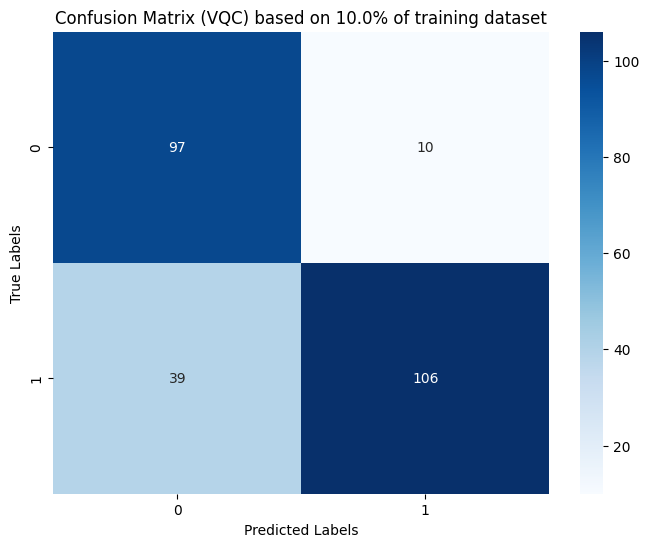

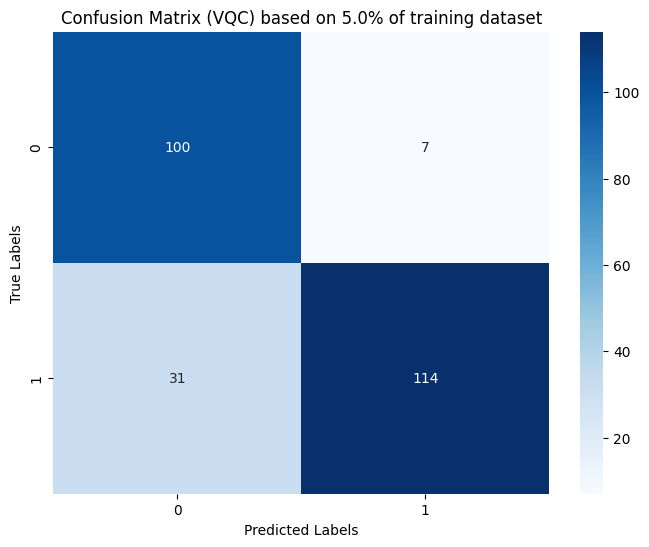

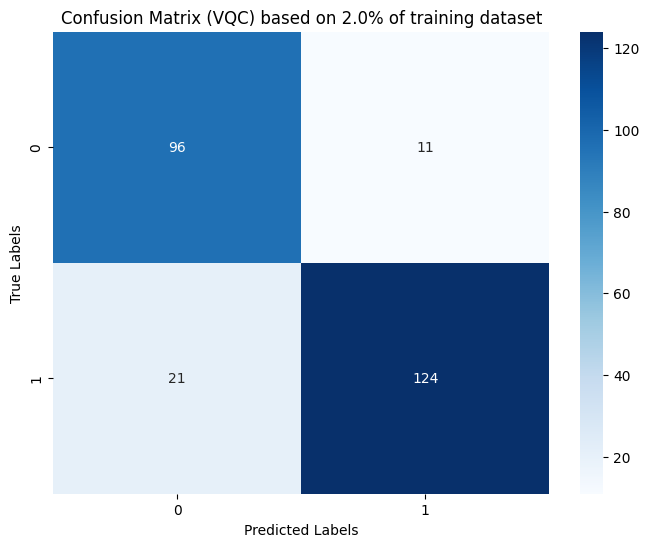

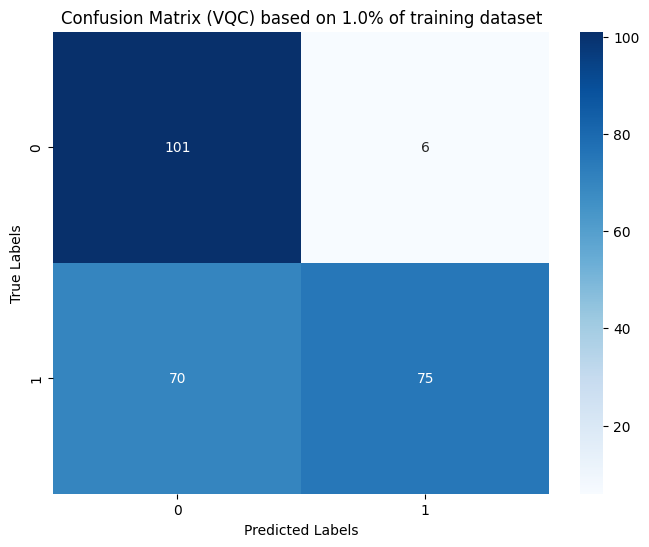

In [78]:
#=======================Calculate the confusion matrix for VQC Model====================================
for pred in pred_vqtask1:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (VQC) based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.show()
#==========================================================================================================

In [79]:
count = 0

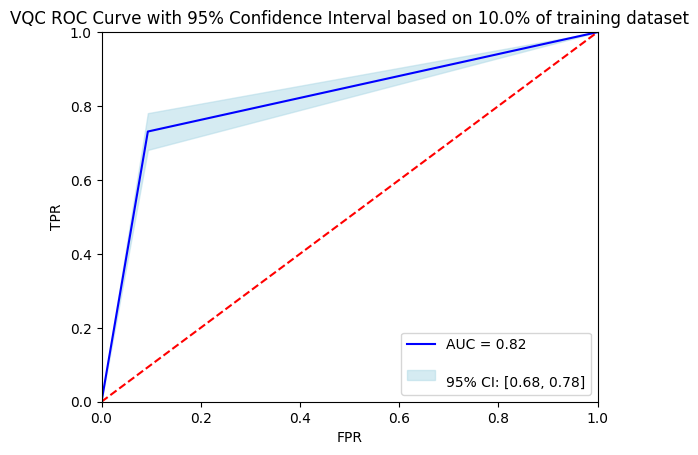

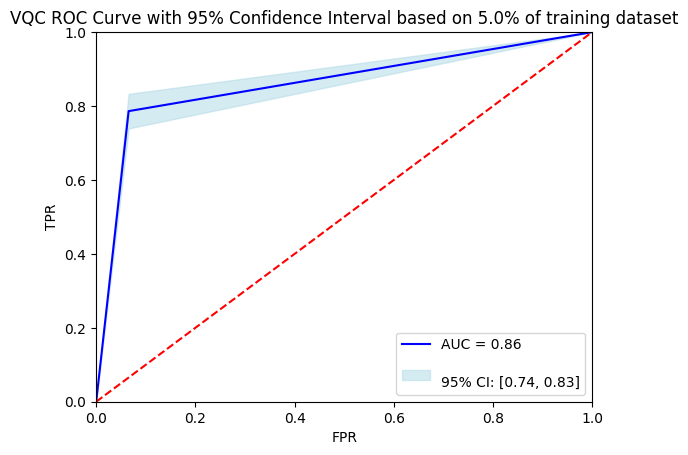

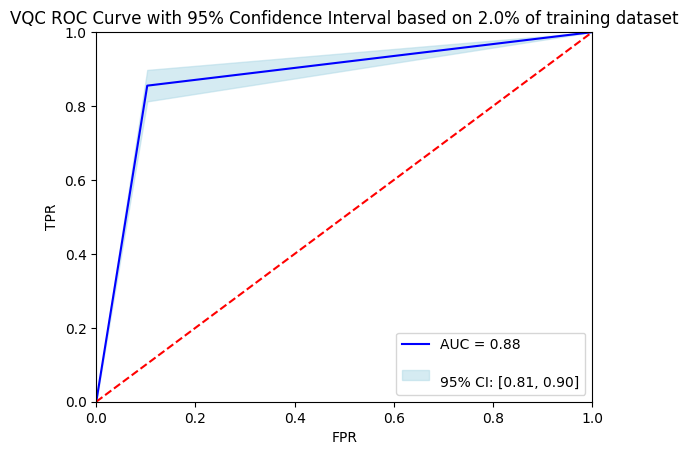

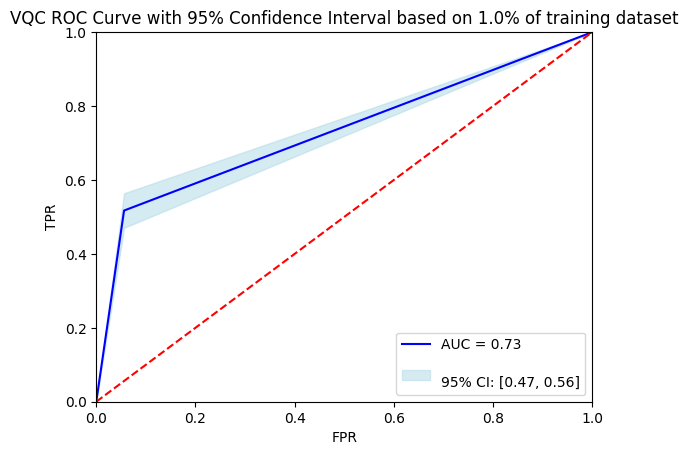

In [80]:
#=================Plotting ROC curve based on VQC====================(By Abhishek)
for pred in pred_vqtask1:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'VQC ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [81]:
#Number of qubits is equal to the number of features
num_qubits = num_features

#Number of steps performed during the training procedure
tau = 1000

#Regularization parameter
C = 100

In [82]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=3)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [83]:
#=====================Pegasos Quantum Support Vector Classifier=========================
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C ,num_steps=tau)
pred_pqsvc = []
for elm in train_set:
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Start time
    start_time = time.time()
    # training
    pegasos_qsvc.fit(X_t.values, y_t.values)
    #End Time
    end_time = time.time()
    # testing
    pred = pegasos_qsvc.predict(X_test.values)
    pred_pqsvc.append(pred)
    pegasos_score = accuracy_score(y_test.values, pred)
    #Calculate the execution time
    execution_time = end_time - start_time
    r2 = r2_score(y_test.values, pred)
    print(f"R-squared value with {elm*100}% training records is ", r2)
    print(f'Accuracy score (PegasosQSVC Model): {pegasos_score} with {elm*100}%  training records')
    print(f'Execution Time (PegasosQSVC model) with {elm*100}%  training records is {execution_time} seconds \n')

R-squared value with 10.0% training records is  0.36654850145020956
Accuracy score (PegasosQSVC Model): 0.8452380952380952 with 10.0%  training records
Execution Time (PegasosQSVC model) with 10.0%  training records is 312.0134847164154 seconds 

R-squared value with 5.0% training records is  0.36654850145020956
Accuracy score (PegasosQSVC Model): 0.8452380952380952 with 5.0%  training records
Execution Time (PegasosQSVC model) with 5.0%  training records is 176.50603985786438 seconds 

R-squared value with 2.0% training records is  0.36654850145020956
Accuracy score (PegasosQSVC Model): 0.8452380952380952 with 2.0%  training records
Execution Time (PegasosQSVC model) with 2.0%  training records is 81.40289306640625 seconds 

R-squared value with 1.0% training records is  0.4802449242668386
Accuracy score (PegasosQSVC Model): 0.873015873015873 with 1.0%  training records
Execution Time (PegasosQSVC model) with 1.0%  training records is 55.250367641448975 seconds 



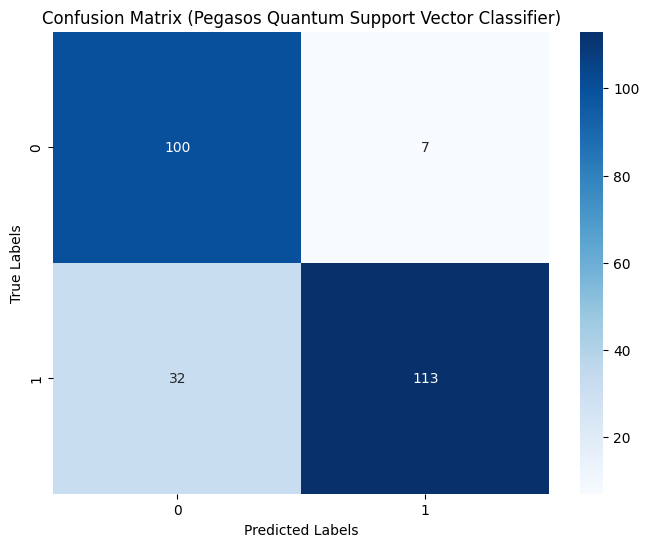

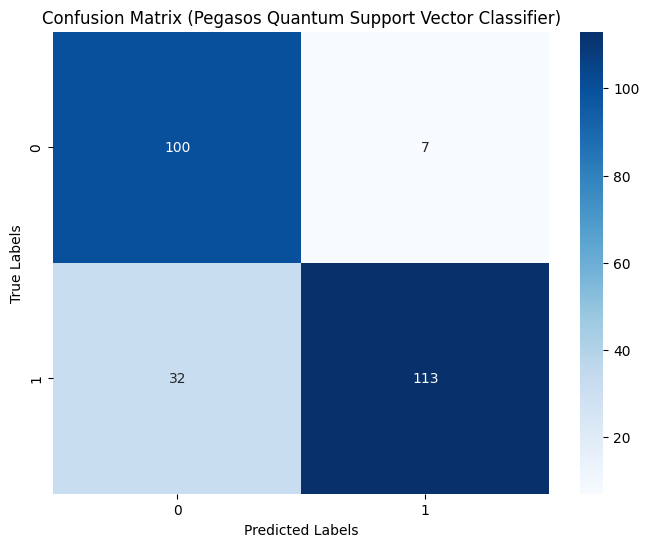

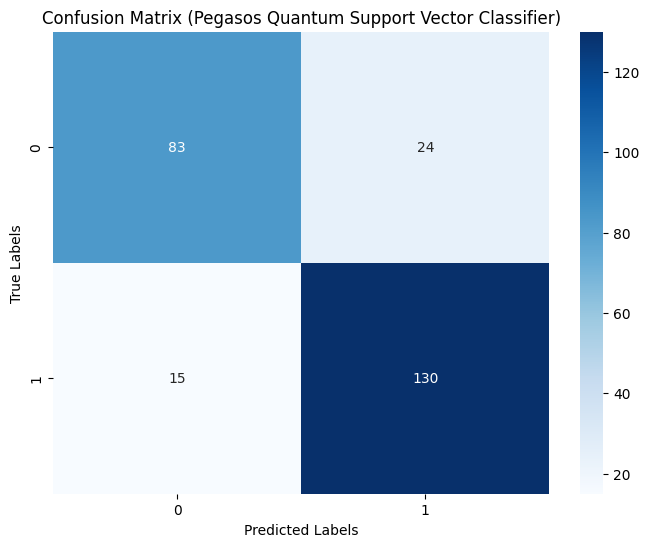

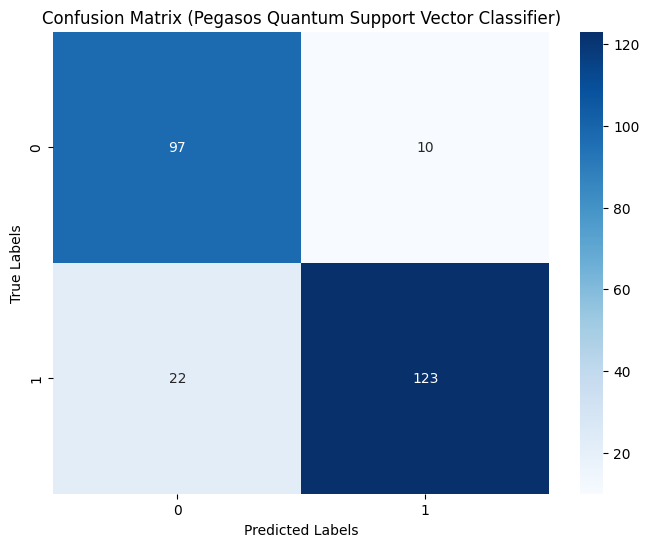

In [84]:
#===========================Calculate the confusion matrix for Pegasos Quantum Support Vector Classifier Model=======
for pred in pred_pqsvc:
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Pegasos Quantum Support Vector Classifier)')
    plt.show()
#==========================================================================================================

In [85]:
count = 0

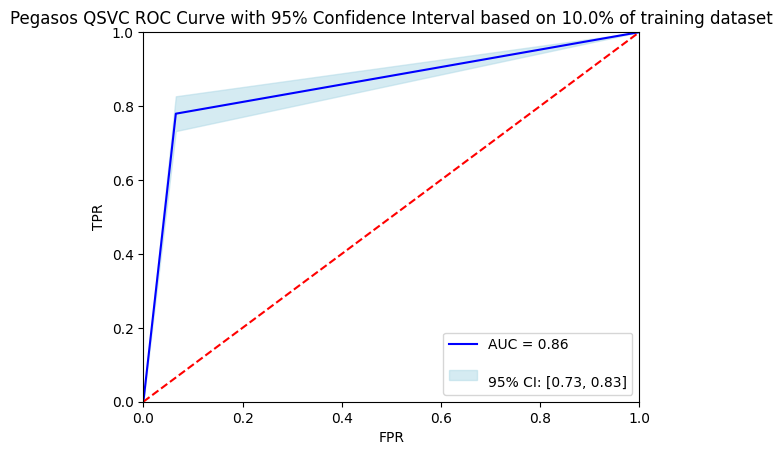

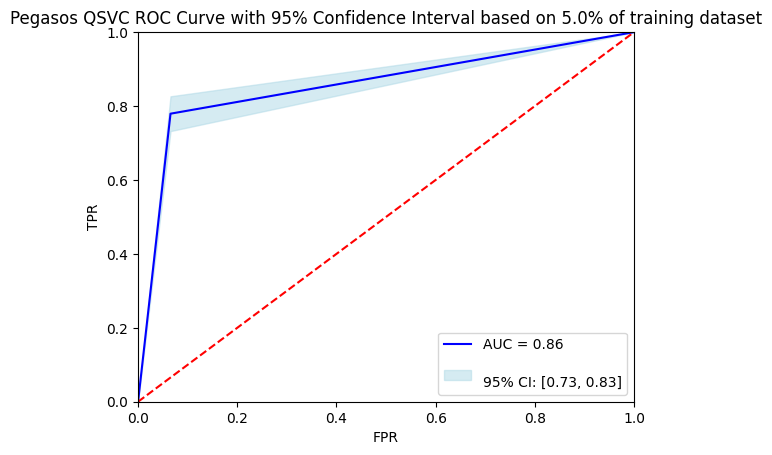

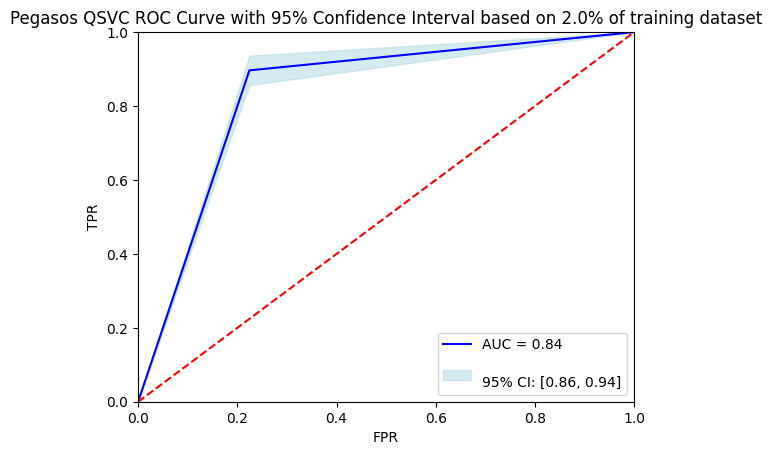

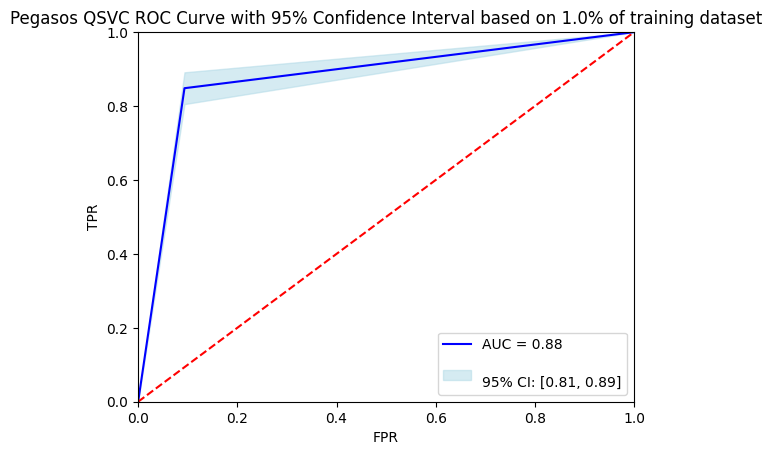

In [86]:
#=================Plotting ROC curve based on Pegasos Quantum Support Vector Classifier model====================(By Abhishek)
for pred in pred_pqsvc:
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Pegasos QSVC ROC Curve with 95% Confidence Interval based on {train_set[count]*100}% of training dataset')
    count = count + 1
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

# <center><h1><b>References</b></h1></center>
<ul><li><p>Quantum machine learning algorithms (qiskit_machine_learning.algorithms) - Qiskit Machine Learning 0.7.0. (n.d.).
<a href='
https://qiskit.org/ecosystem/machine-learning/apidocs/qiskit_machine_learning.algorithms.html#module-qiskit_machine_learning.algorithm'>Qiskit Machine Learning URL </a>s</p></li>
</ul>